In [1]:
import os
import pandas as pd
import cv2 as cv
import PIL.Image as Image
import numpy as np  

In [3]:
train_path = "../Data/train/"
test_path = "../Data/test/"

train_label = dict()
for i,folder in enumerate(os.listdir(train_path)):
    train_label[i]=folder
print(train_label)


{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}


In [15]:
imagelists = []
for i in range(12):
    fathername = os.path.join(train_path,train_label[i])
    imagelist = []
    imagename = [filename for filename in os.listdir(fathername) if filename.endswith('png')]
    for filename in imagename:
        imagepath = os.path.join(fathername,filename)
        img  = Image.open(imagepath)
        imagelist.append(img)
    imagelists.append(imagelist)
lenofeach = []
for imglist in imagelists:
    lenofeach.append(len(imglist))
imagename = list(train_label.values())
imagelabel = list(train_label.keys())
print(lenofeach)
print(imagename)
print(imagelabel)

[248, 362, 268, 571, 203, 431, 613, 206, 486, 220, 461, 371]
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


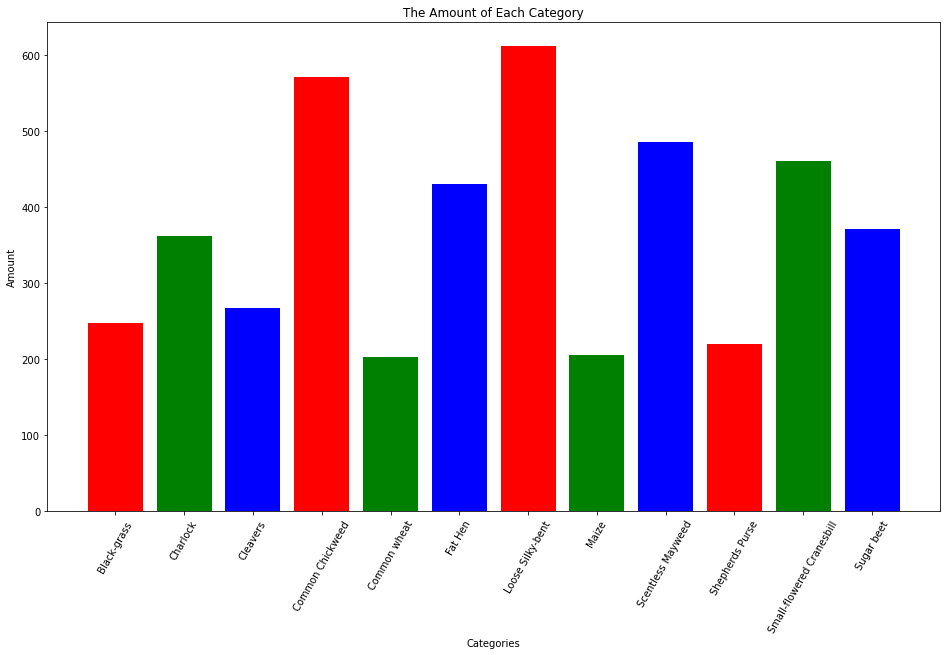

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.bar(imagename,lenofeach,color = ['r','g','b'])
plt.xlabel("Categories")
plt.ylabel("Amount")
plt.xticks(rotation  = 60)
plt.title("The Amount of Each Category")
plt.show()

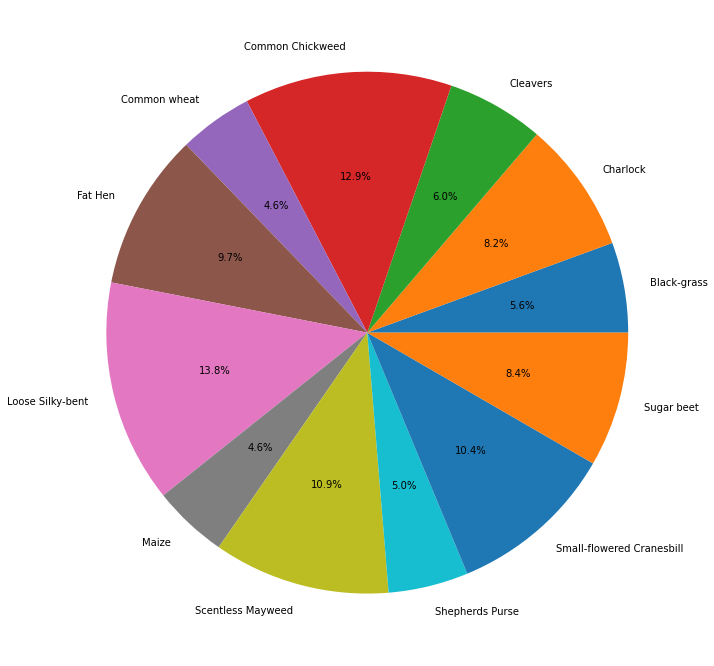

In [44]:
percentofeach = [percent*100/sum(lenofeach) for percent in lenofeach]
plt.figure(figsize = (16,12))
plt.pie(percentofeach , labels =imagename,autopct="%1.1f%%")
plt.show()

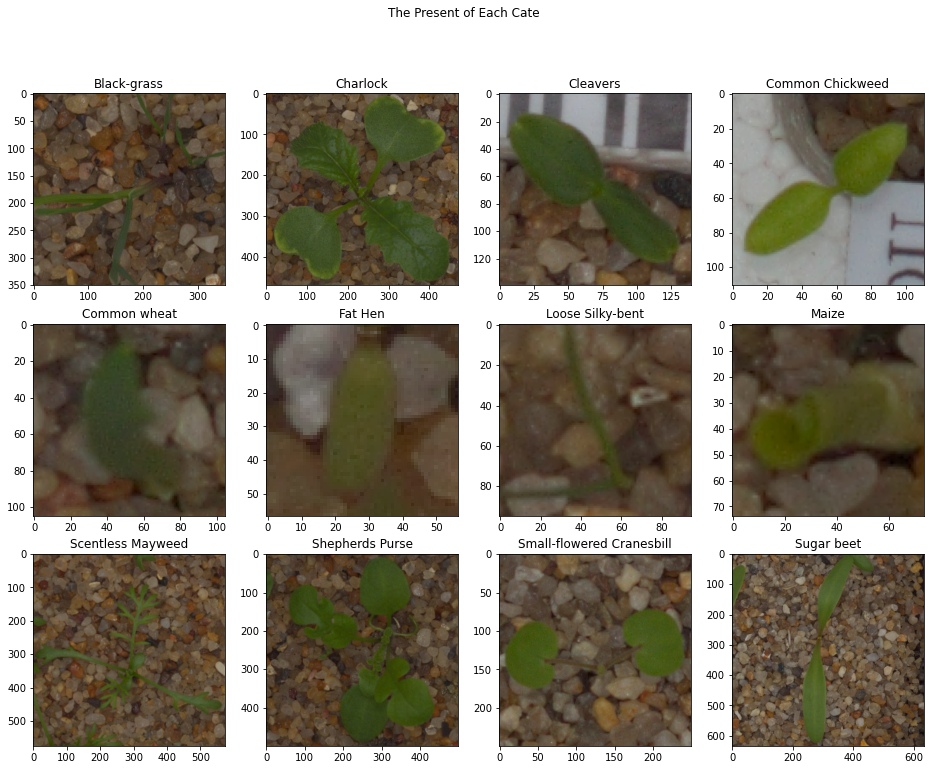

In [40]:
fig,axes = plt.subplots(3,4,figsize =(16,12))
for i in range(12):
    row = i//4
    col = i%4
    axes[row][col].imshow(imagelists[i][100])
    axes[row][col].set_title(imagename[i])
fig.suptitle("The Present of Each Cate")
plt.show()

*****
* 使用NearMiss方法对X_train进行降采样
* 将图片resize成224*224
* 将resize之后的图片转化成灰度图片：问题发现有一些图片并不是RGB格式,导致特征长度不一致
* 将数据标准化之后放进逻辑回归中训练
* 输出相关的分数
* 输出混淆矩阵热力图

In [1]:
import os
import pandas as pd
import cv2 as cv
import PIL.Image as Image
import numpy as np  
train_path = "../Data/train/"
test_path = "../Data/test/"

train_label = dict()
for i,folder in enumerate(os.listdir(train_path)):
    train_label[i]=folder
print(train_label)

imagelists = []
for i in range(12):
    fathername = os.path.join(train_path,train_label[i])
    imagelist = []
    imagename = [filename for filename in os.listdir(fathername) if filename.endswith('png')]
    for filename in imagename:
        imagepath = os.path.join(fathername,filename)
        img  = Image.open(imagepath)
        imagelist.append(img)
    imagelists.append(imagelist)
lenofeach = []
for imglist in imagelists:
    lenofeach.append(len(imglist))
imagename = list(train_label.values())
imagelabel = list(train_label.keys())
print(lenofeach)
print(imagename)
print(imagelabel)

{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}
[248, 362, 268, 571, 203, 431, 613, 206, 486, 220, 461, 371]
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
RANDOM_STATE = 42
labellists = []
for i,imagelist in enumerate(imagelists):
    labellist = [i for _ in range(len(imagelist))]
    labellists.append(labellist)
size = (224,224)
resizeimagelists = []
for imagelist in imagelists:
    resizeimagelist = []
    for image in imagelist:
        newimg = image.resize(size).convert('L')
        resizeimagelist.append(newimg)
    resizeimagelists.append(resizeimagelist)

In [10]:
X = [[np.array(img).flatten() for img in resizeimagelist] for resizeimagelist in resizeimagelists]
y = [[np.array(i) for i in labellist]for labellist in labellists]
X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]
print(classification_report_imbalanced(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

* pre 精确度（precision）:所有被预测为正类别的样本中，真正的正类别的比例
* rec 召回率（recall）:在所有实际正类别样本中，被模型预测正确的比例
* f1  f1分数（F1-Score）：pre和rec的调和平均值

                   pre       rec       spe        f1       geo       iba       sup

          0       0.08      0.08      0.94      0.08      0.27      0.07        53
          1       0.08      0.05      0.94      0.06      0.22      0.05        76
          2       0.18      0.36      0.89      0.24      0.57      0.31        55
          3       0.16      0.12      0.90      0.14      0.33      0.10       121
          4       0.07      0.08      0.94      0.08      0.28      0.07        48
          5       0.11      0.11      0.91      0.11      0.32      0.09        80
          6       0.21      0.10      0.93      0.13      0.30      0.08       136
          7       0.06      0.14      0.91      0.08      0.35      0.11        37
          8       0.13      0.20      0.87      0.16      0.41      0.16        82
          9       0.08      0.19      0.89      0.11      0.41      0.16        42
         10       0.09      0.06      0.94      0.07      0.24      0.05        84
         11       0.26      0.09      0.98      0.14      0.30      0.08        74

avg / total       0.14      0.12      0.92      0.12      0.33      0.10       888



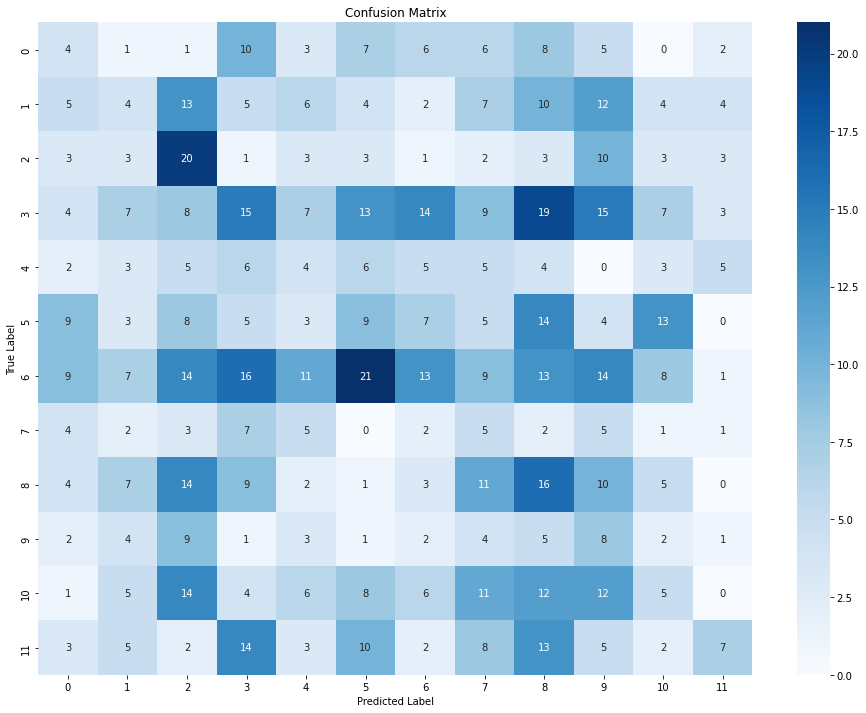

****
## 结果分析
* 从混淆矩阵来看总体分类效果较差
* 经过nearmiss降采样之后训练出来的LR分类器，对于第6类和第11类分类效果不错，数据集中此两类原始图片较为清晰
* 对于第5类的预测效果较差，大量样本被错误预测为第6类，这两类植物幼苗较为相似

***
## 后续优化
* 通过颜色分割将图片植物部分与其他无关杂物区分出来
* 重复实验对比查看效果

<class 'numpy.ndarray'> (334, 334)
<class 'numpy.ndarray'> (334, 334, 3)


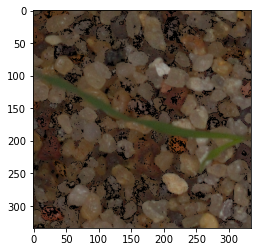

In [39]:
def colorseg_rgb(img):
    image_array = np.array(img)
    red_mask = ((image_array[:,:,0]>40) & (image_array[:,:,0]<70))
    green_mask = (image_array[:,:,1]>60)
    blue_mask = ((image_array[:,:,2]<40) & (image_array[:,:,2]>20))
    print(type(red_mask),red_mask.shape)
    segmented_image = np.zeros_like(image_array)

    segmented_image[red_mask] = image_array[red_mask]
    segmented_image[green_mask] = image_array[green_mask]
    segmented_image[blue_mask] = image_array[blue_mask]
    return segmented_image

img = colorseg_rgb(imagelists[0][0].convert('RGB'))
print(type(img),img.shape)
plt.imshow(img)
plt.show()

* 通过取色板对不同的绿色对应的RGB值进行吸取设置对应的阈值，RGB图片模式并不适合做颜色分割
* 查阅文献之后发现HSV格式更加适合做颜色风格
* 同时采用opencv进行相关的颜色分割
****
**参考文献**
* https://blog.csdn.net/weixin_44598554/article/details/130627957 
* https://stackoverflow.com/questions/38850496/what-is-the-range-of-rgb-for-a-specific-colour 
* https://docs.opencv.org/3.4/df/d9d/tutorial_py_colorspaces.html 

In [1]:
import os
import pandas as pd
import cv2 as cv
import PIL.Image as Image
import numpy as np  
train_path = "../Data/train/"
test_path = "../Data/test/"

train_label = dict()
for i,folder in enumerate(os.listdir(train_path)):
    train_label[i]=folder
print(train_label)

imagelists = []
for i in range(12):
    fathername = os.path.join(train_path,train_label[i])
    imagelist = []
    imagename = [filename for filename in os.listdir(fathername) if filename.endswith('png')]
    for filename in imagename:
        imagepath = os.path.join(fathername,filename)
        img  = cv.imread(imagepath)
        if img.shape[2] == 4:
            img = cv.cvtColor(img,cv.COLOR_BGRA2BGR)
        hsv_img = cv.cvtColor(img,cv.COLOR_BGR2HSV)
        imagelist.append(hsv_img)
    imagelists.append(imagelist)
lenofeach = []
for imglist in imagelists:
    lenofeach.append(len(imglist))
imagename = list(train_label.values())
imagelabel = list(train_label.keys())
print(lenofeach)
print(imagename)
print(imagelabel)

{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}
[248, 362, 268, 571, 203, 431, 613, 206, 486, 220, 461, 371]
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


****
不足：
* 没捕捉到植物根茎（棕色部分）Imagelists[2][0]

In [2]:
def colorseg_hsv(hsv):
    lower_green = np.array([25,70,40])
    upper_green = np.array([85,255,255])
    mask_green = cv.inRange(hsv, lower_green, upper_green)
    result = cv.bitwise_and(hsv, hsv, mask=mask_green)
    return result
colorseglists = [[colorseg_hsv(img) for img in sublist] for sublist in imagelists]

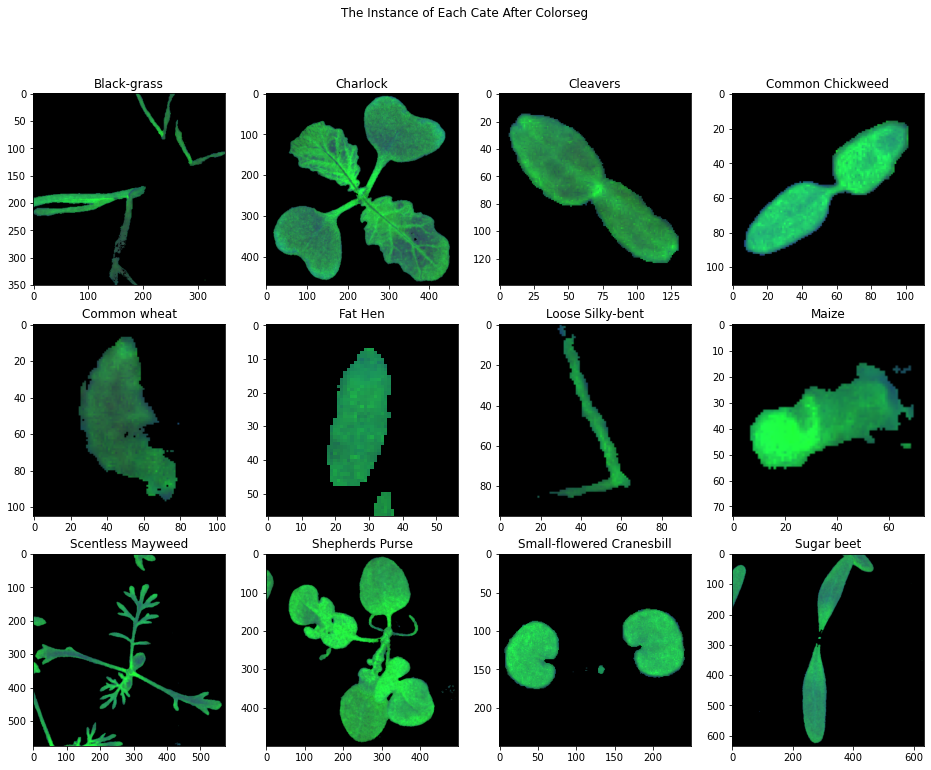

In [66]:
fig,axes = plt.subplots(3,4,figsize =(16,12))
for i in range(12):
    row = i//4
    col = i%4
    axes[row][col].imshow(colorseglists[i][100])
    axes[row][col].set_title(imagename[i])
fig.suptitle("The Instance of Each Cate After Colorseg")
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
import seaborn as sns

RANDOM_STATE = 42
labellists = []
for i,imagelist in enumerate(colorseglists):
    labellist = [i for _ in range(len(imagelist))]
    labellists.append(labellist)

size = (224,224)
resizeimagelists = []
for imagelist in colorseglists:
    resizeimagelist = []
    for image in imagelist:
        newimg = cv.resize(image,size,interpolation=cv.INTER_CUBIC)
        newimg = cv.cvtColor(newimg,cv.COLOR_HSV2BGR)
        newimg = cv.cvtColor(newimg,cv.COLOR_BGR2GRAY)
        resizeimagelist.append(newimg)
    resizeimagelists.append(resizeimagelist)

In [75]:

X = [[img.flatten() for img in resizeimagelist] for resizeimagelist in resizeimagelists]
y = [[np.array(i) for i in labellist]for labellist in labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
#1500轮仍未收敛
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1500))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   pre       rec       spe        f1       geo       iba       sup

          0       0.14      0.13      0.95      0.13      0.35      0.11        53
          1       0.58      0.70      0.95      0.63      0.81      0.65        76
          2       0.25      0.35      0.93      0.29      0.57      0.30        55
          3       0.26      0.23      0.90      0.25      0.46      0.19       121
          4       0.14      0.21      0.93      0.17      0.44      0.18        48
          5       0.45      0.30      0.96      0.36      0.54      0.27        80
          6       0.53      0.24      0.96      0.33      0.48      0.21       136
          7       0.25      0.65      0.92      0.36      0.77      0.58        37
          8       0.30      0.17      0.96      0.22      0.40      0.15        82
          9       0.23      0.50      0.92      0.32      0.68      0.44        42
         10       0.71      0.65      0.97      0.68      0.80      0.62        84
   

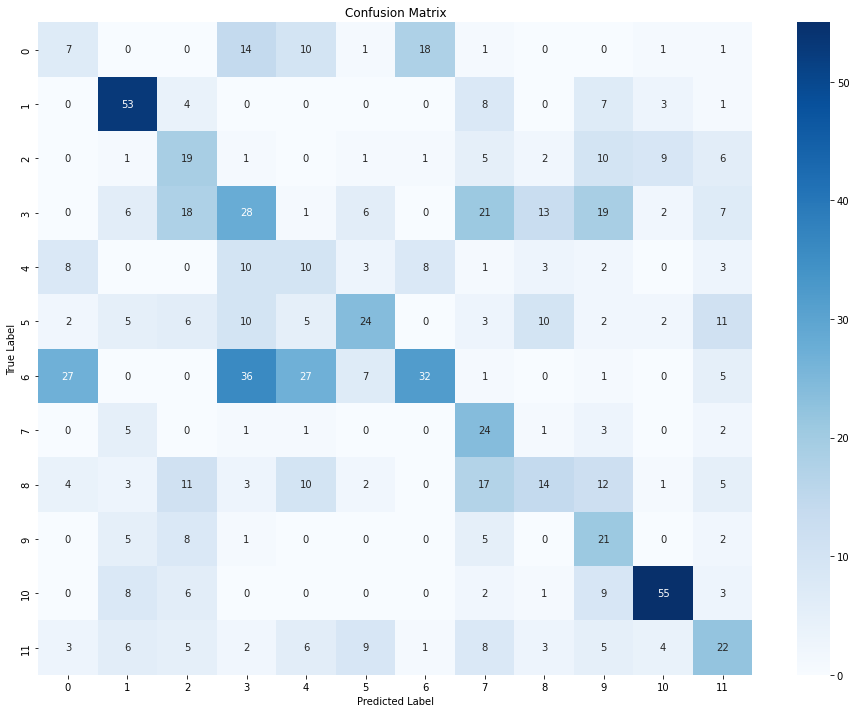

In [76]:

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
### 结果分析
* 相比于没有进行颜色分割的图像来说，颜色分割之后在使用逻辑回归分类的效果有了显著的提升（f1从0.12到0.35）
* 第1类以及第10类预测效果不错，召回率分别是0.7和0.65，F1分数分别是0.63和0.68
* 第0类以及第4类预测效果欠佳，f1分数均为超过0.2
### 后续优化
* 采用SIFT方法提取特征后与颜色风格后的图像合并再进行分类
* 选取不同的分类器尝试
### 参考文献
* https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html 
* Lowe, D. G. (2004). Distinctive image features from scale-invariant keypoints. International journal of computer vision, 60, 91-110.
* 

**Harris Corner Detection**：哈里斯角点检测 旋转不变  
****
**SIFT**：尺度不变特征变换（放缩）

In [4]:
sift = cv.SIFT_create()

def siftdetect(img):
    _ , des = sift.detectAndCompute(img,None)
    return des
siftlists = []
for imagelist in resizeimagelists:
    siftlist =[]
    for image in imagelist:
        siftlist.append(siftdetect(image))
    siftlists.append(siftlist)

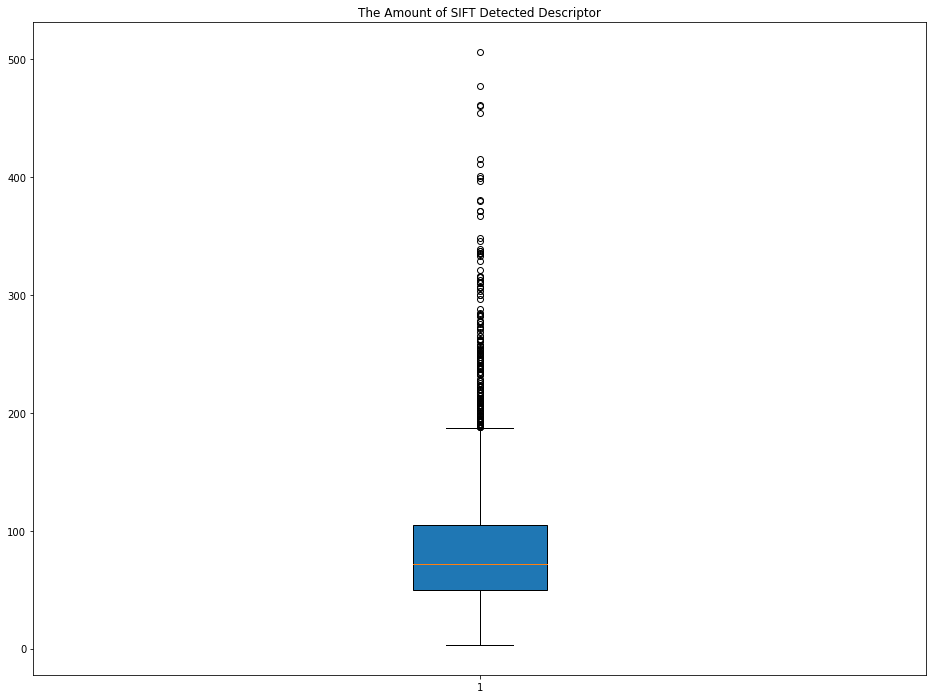

In [96]:
lenofdeslist = [t.shape[0] for sublist in siftlists for t in sublist if t is not None]
plt.figure(figsize=(16,12))
plt.boxplot(lenofdeslist,patch_artist=True)
plt.title("The Amount of SIFT Detected Descriptor")
plt.show()

In [102]:
print("Q:",np.nanpercentile(lenofdeslist,10))

Q: 32.0


In [97]:
from scipy.stats import describe

print("Describe Statistics:\n",describe(lenofdeslist))

Describe Statistics:
 DescribeResult(nobs=4438, minmax=(3, 506), mean=83.73704371338441, variance=2738.3570272737256, skewness=2.15238281761885, kurtosis=8.311224139545397)


***
* 由于sift检测出来的特征点的数目不一致，并且可能存在图片检测不出特征点，因此尝试抛弃特征点数目较少的图片，这里抛弃前10%的图片，即保留32个特征点

In [5]:
isleftimages = []
for sublist in siftlists:
    leftimage = []
    for t in sublist:
        if t is not None:
            if t.shape[0]>=32:
                leftimage.append(True)
            else:
                leftimage.append(False)
        else:
            leftimage.append(False)
    isleftimages.append(leftimage)
filtered_siftlists = [[t for t, condition in zip(sublist, conditions) if condition] for sublist, conditions in zip(siftlists, isleftimages)]

[195, 362, 267, 564, 181, 394, 557, 162, 486, 220, 459, 181] 4028


Text(0.5, 1.0, 'The Amount of Each Cate After Filter')

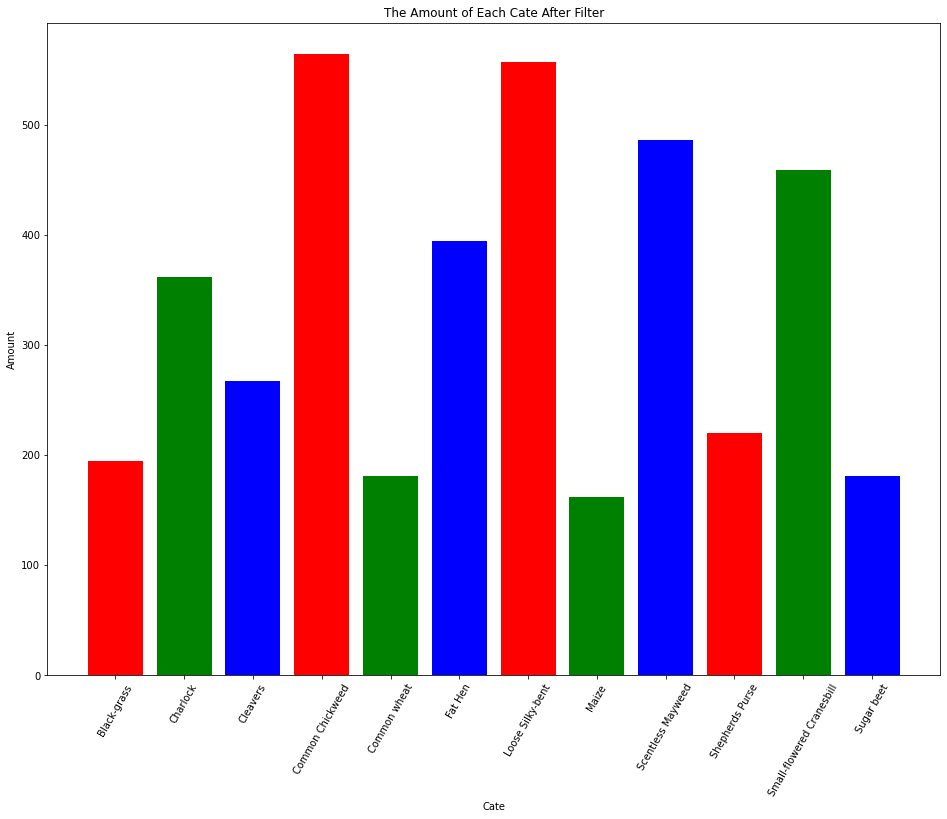

In [126]:
lenoffiltered = [len(t) for t in filtered_siftlists]
print(lenoffiltered,sum(lenoffiltered))
plt.figure(figsize=(16,12))
plt.bar(imagename,lenoffiltered,color=['r','g','b'])
plt.xticks(rotation=60)
plt.xlabel("Cate")
plt.ylabel("Amount")
plt.title("The Amount of Each Cate After Filter")

In [6]:
filtered_imagelists = [[t for t, condition in zip(sublist, conditions) if condition] for sublist, conditions in zip(resizeimagelists, isleftimages)]
filtered_labellists = [[t for t, condition in zip(sublist, conditions) if condition] for sublist, conditions in zip(labellists, isleftimages)]

****
* 过滤完低质量的图片之后，数据的总体分布特征并未被影响，由此可知，过滤可行
* 即使过滤之后，siftlists的数量仍不一致，考虑截断或者主成分析或者聚类等其他降维方式

In [7]:
reverse_siftlists = [[t.T for t in sublist] for sublist in filtered_siftlists]
tuncated_siftlists = [[t[:,:32]for t in sublist] for sublist in reverse_siftlists]

In [134]:

X = [[np.concatenate((img.flatten(),des.flatten())) for img,des in zip(filterimagelist,siftlist)] for filterimagelist,siftlist in zip(filtered_imagelists,tuncated_siftlists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
#1500轮仍未收敛
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1500))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   pre       rec       spe        f1       geo       iba       sup

          0       0.30      0.57      0.91      0.39      0.72      0.50        53
          1       0.72      0.64      0.97      0.68      0.79      0.60        80
          2       0.21      0.25      0.94      0.23      0.49      0.22        48
          3       0.45      0.22      0.96      0.30      0.46      0.20       113
          4       0.18      0.38      0.92      0.24      0.59      0.33        34
          5       0.43      0.27      0.96      0.33      0.51      0.24        88
          6       0.59      0.36      0.96      0.45      0.58      0.32       115
          7       0.38      0.50      0.97      0.43      0.70      0.46        32
          8       0.39      0.30      0.95      0.34      0.53      0.27        83
          9       0.27      0.35      0.94      0.30      0.57      0.31        46
         10       0.76      0.80      0.97      0.78      0.88      0.76        84
   

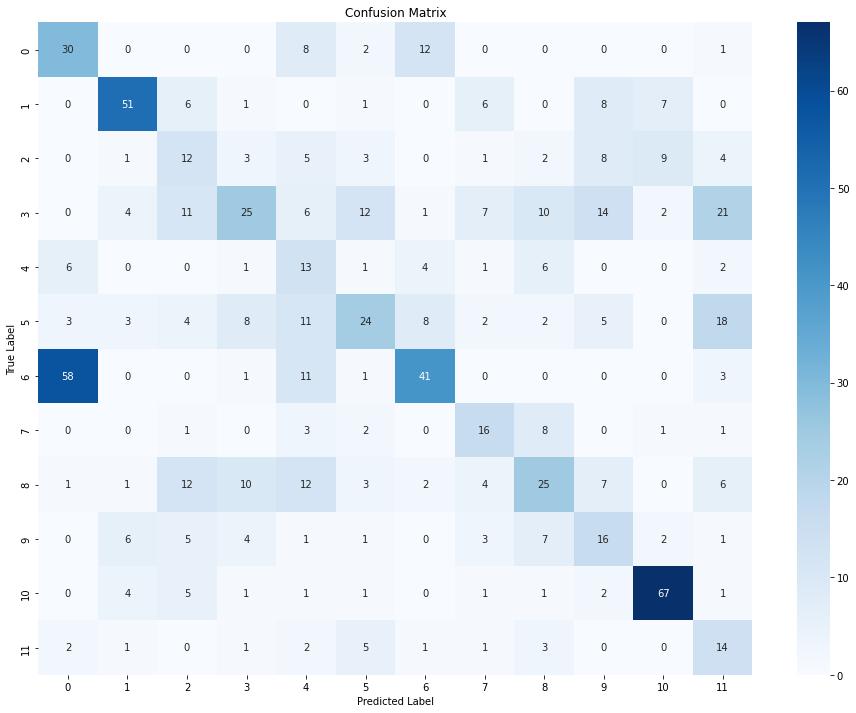

In [135]:

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

***
### 结果分析
* 相比于没有进行SIFT特征提取的图像来说，颜色分割加上SIFT后在使用逻辑回归分类的效果又显著的提升（f1从0.35到0.42）
* 第1类以及第10类保持了同颜色分割相似的预测效果
* 第0类以及第4类预测效果有了明显的提升，f1分数均超过了0.2，第0类更是达到了0.39
* 第0类被错误预测成第6类的占比较高，从数据集上观察，这两类确实较难区分，较为混淆
### 后续优化
* 选取不同的分类器尝试
### 参考文献
* https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

****
#### 决策树分类器

In [137]:
from sklearn.tree import DecisionTreeClassifier
X = [[np.concatenate((img.flatten(),des.flatten())) for img,des in zip(filterimagelist,siftlist)] for filterimagelist,siftlist in zip(filtered_imagelists,tuncated_siftlists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2),  DecisionTreeClassifier())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.20      0.43      0.88      0.28      0.62      0.37        53
          1       0.31      0.20      0.95      0.24      0.44      0.18        80
          2       0.29      0.31      0.95      0.30      0.55      0.28        48
          3       0.32      0.18      0.94      0.23      0.41      0.15       113
          4       0.10      0.18      0.93      0.12      0.40      0.15        34
          5       0.26      0.17      0.94      0.21      0.40      0.15        88
          6       0.42      0.34      0.92      0.38      0.56      0.29       115
          7       0.15      0.25      0.94      0.18      0.48      0.22        32
          8       0.35      0.22      0.95      0.27      0.45      0.19        83
          9       0.07      0.13      0.90      0.09      0.34      0.11        46
         10       0.51      0.33      0.96      0.40      0.57      0.30        84
   

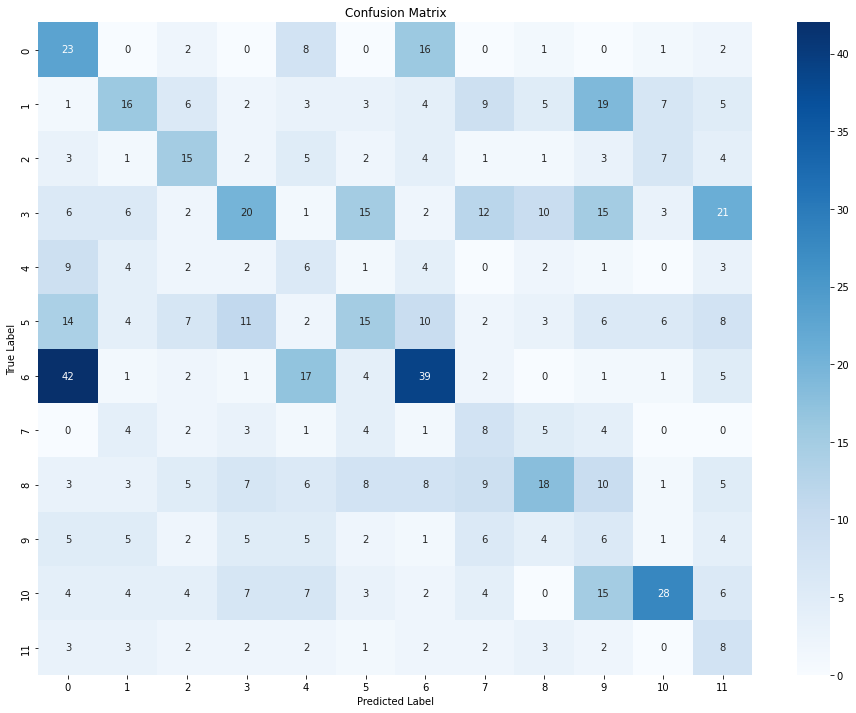

In [138]:


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

****
### 结果分析
* 决策树的分类效果较差，可能是由于特征维度为224x224+128x30 过于庞大，决策树处理较差
### 后续优化
* 可以考虑对特征进行降维保留主要特征在进行分类 

****
#### 支持向量机

In [170]:
from sklearn.svm import SVC
X = [[np.concatenate((img.flatten(),des.flatten())) for img,des in zip(filterimagelist,siftlist)] for filterimagelist,siftlist in zip(filtered_imagelists,tuncated_siftlists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2),StandardScaler(),  SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.31      0.55      0.91      0.39      0.71      0.48        53
          1       0.70      0.78      0.96      0.73      0.86      0.73        80
          2       0.67      0.58      0.98      0.62      0.76      0.55        48
          3       0.71      0.28      0.98      0.41      0.53      0.26       113
          4       0.25      0.41      0.95      0.31      0.62      0.37        34
          5       0.45      0.22      0.97      0.29      0.46      0.19        88
          6       0.59      0.40      0.95      0.48      0.62      0.36       115
          7       0.29      0.66      0.93      0.40      0.78      0.60        32
          8       0.50      0.35      0.96      0.41      0.58      0.31        83
          9       0.44      0.54      0.96      0.49      0.72      0.50        46
         10       0.94      0.69      0.99      0.79      0.83      0.67        84
   

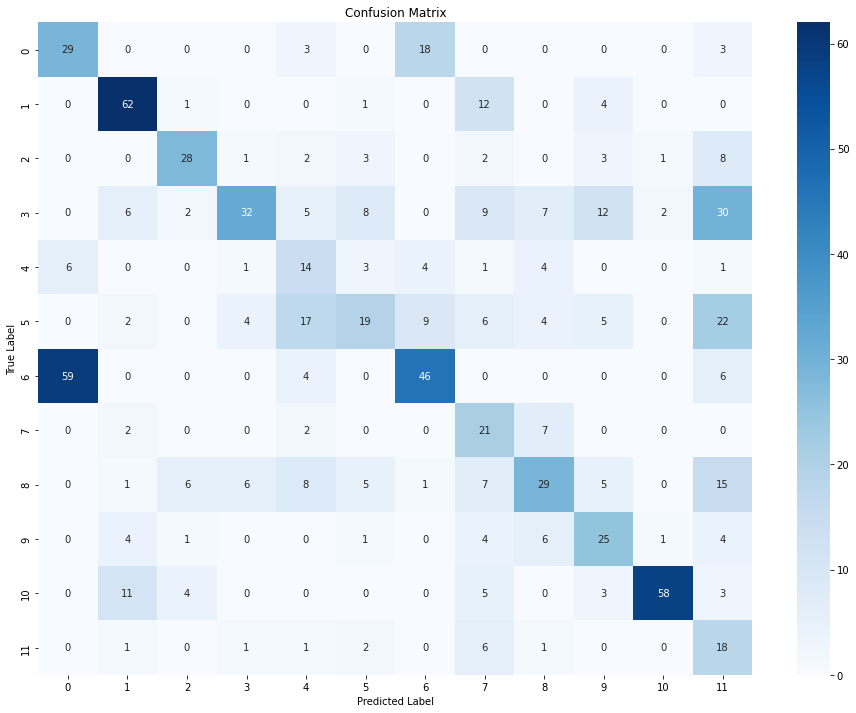

In [171]:



conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### 结果分析
* 支持向量机的效果相比于逻辑回归更加优越，f1分数从0.45提升到0.50
### 后续优化
* 为支持向量机选择更好的超参数
* 将支持向量机以及逻辑回归一起训练，一起决策

****
#### KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier
X = [[np.concatenate((img.flatten(),des.flatten())) for img,des in zip(filterimagelist,siftlist)] for filterimagelist,siftlist in zip(filtered_imagelists,tuncated_siftlists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2),StandardScaler(),  KNeighborsClassifier(n_neighbors=5))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.23      0.75      0.82      0.36      0.79      0.62        53
          1       0.75      0.50      0.98      0.60      0.70      0.47        80
          2       0.24      0.79      0.84      0.37      0.82      0.66        48
          3       0.54      0.33      0.96      0.41      0.56      0.29       113
          4       0.09      0.09      0.96      0.09      0.29      0.08        34
          5       0.53      0.27      0.97      0.36      0.51      0.25        88
          6       0.41      0.25      0.94      0.31      0.49      0.22       115
          7       0.50      0.19      0.99      0.27      0.43      0.17        32
          8       0.37      0.22      0.96      0.27      0.46      0.19        83
          9       0.30      0.22      0.97      0.25      0.46      0.19        46
         10       0.75      0.50      0.98      0.60      0.70      0.47        84
   

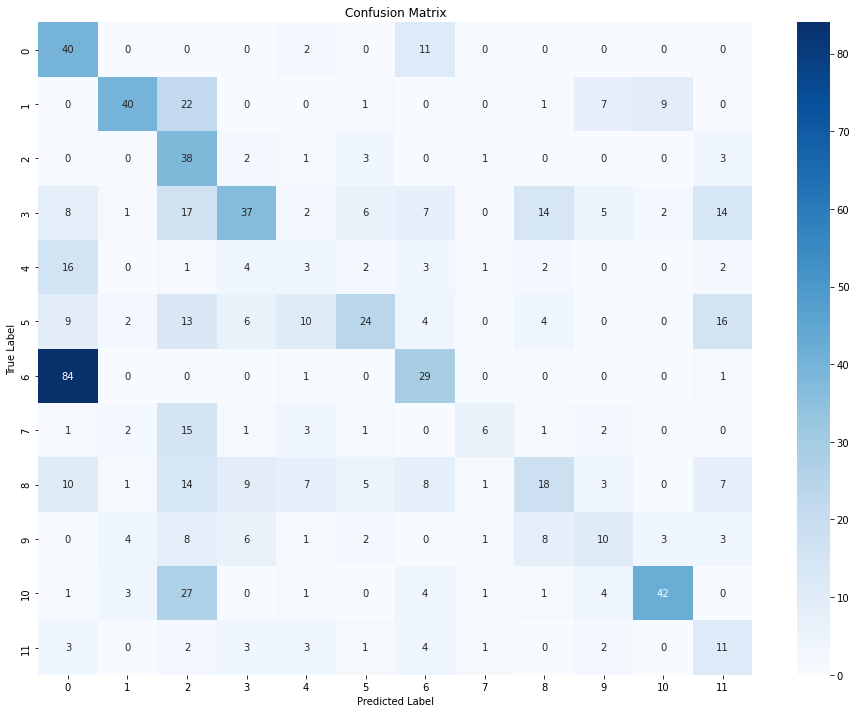

In [181]:




conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
#### naive_bayes

In [178]:
from sklearn.naive_bayes import GaussianNB
X = [[np.concatenate((img.flatten(),des.flatten())) for img,des in zip(filterimagelist,siftlist)] for filterimagelist,siftlist in zip(filtered_imagelists,tuncated_siftlists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), GaussianNB())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.20      0.17      0.95      0.18      0.40      0.15        53
          1       0.26      0.10      0.97      0.14      0.31      0.09        80
          2       0.09      0.58      0.63      0.16      0.61      0.37        48
          3       0.26      0.11      0.95      0.15      0.32      0.09       113
          4       0.15      0.29      0.93      0.20      0.52      0.26        34
          5       0.12      0.01      0.99      0.02      0.11      0.01        88
          6       0.58      0.17      0.98      0.26      0.40      0.15       115
          7       0.19      0.28      0.95      0.23      0.52      0.25        32
          8       0.14      0.04      0.97      0.06      0.19      0.03        83
          9       0.11      0.22      0.90      0.15      0.44      0.18        46
         10       0.57      0.14      0.99      0.23      0.38      0.13        84
   

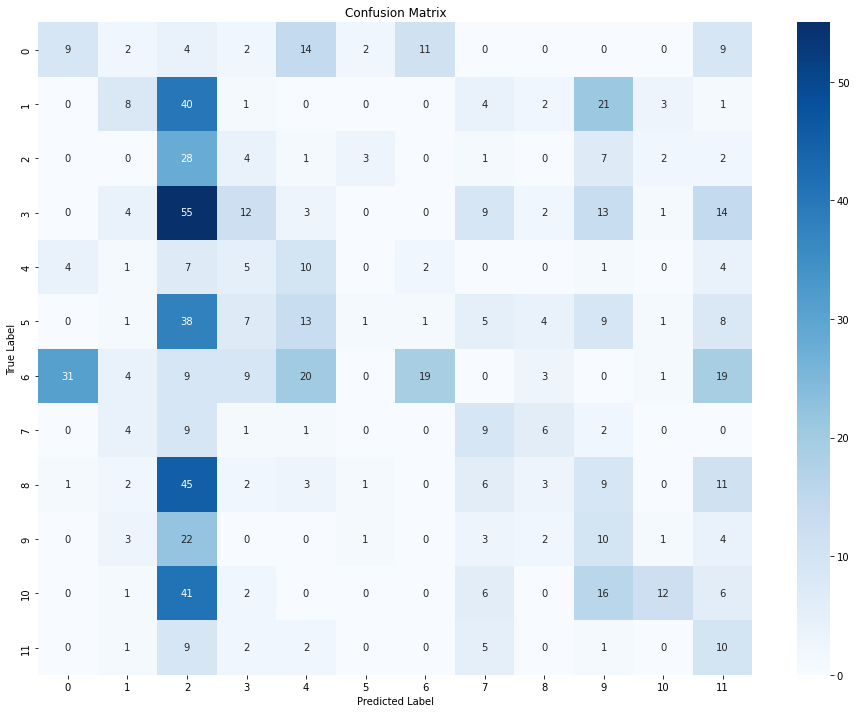

In [179]:





conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



****
**提取HOG与LBP特征**

****
***HOG***


In [8]:
from skimage.feature import hog
def extracthog(img):
    features,_ = hog(img, orientations=8, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), visualize=True, block_norm='L2-Hys')
    return features
filtered_hoglists = []
for sublist in filtered_imagelists:
    hoglist = []
    for img in sublist:
        hoglist.append(extracthog(img))
    filtered_hoglists.append(hoglist)

In [172]:
from sklearn.svm import SVC
X = [[np.concatenate((img.flatten(),des.flatten(),hogf)) for img,des,hogf in zip(filterimagelist,siftlist,hoglist)] for filterimagelist,siftlist,hoglist in zip(filtered_imagelists,tuncated_siftlists,filtered_hoglists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2),StandardScaler(),  SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.32      0.55      0.92      0.40      0.71      0.48        53
          1       0.70      0.78      0.96      0.73      0.86      0.73        80
          2       0.68      0.58      0.98      0.63      0.76      0.55        48
          3       0.71      0.28      0.98      0.41      0.53      0.26       113
          4       0.24      0.41      0.94      0.30      0.62      0.37        34
          5       0.45      0.23      0.97      0.30      0.47      0.20        88
          6       0.59      0.39      0.96      0.47      0.61      0.35       115
          7       0.29      0.66      0.93      0.40      0.78      0.60        32
          8       0.50      0.35      0.96      0.41      0.58      0.31        83
          9       0.45      0.57      0.96      0.50      0.74      0.52        46
         10       0.95      0.70      1.00      0.81      0.84      0.68        84
   

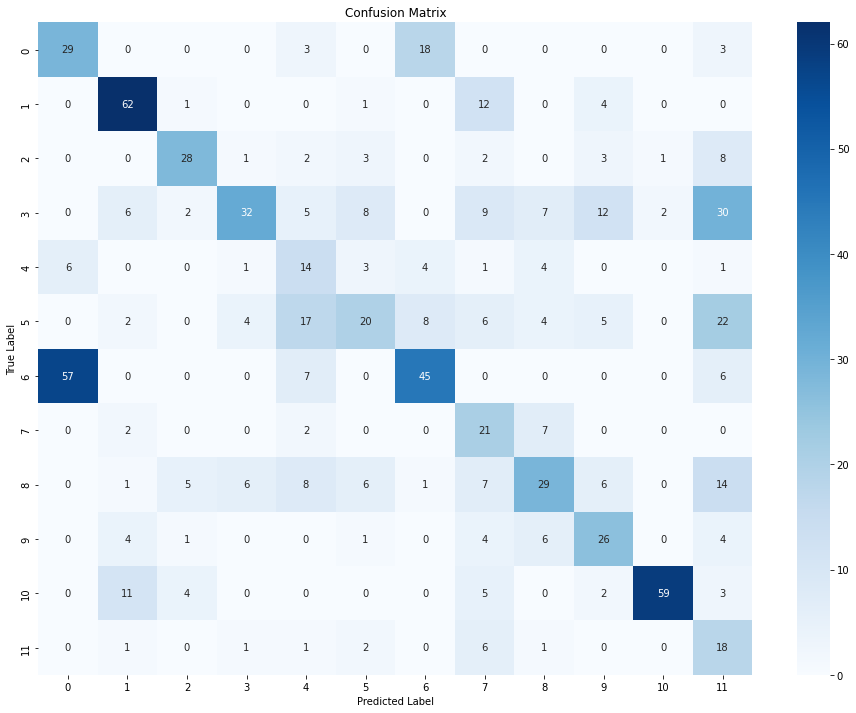

In [173]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


********
下面是LogisticRegression

                   pre       rec       spe        f1       geo       iba       sup

          0       0.30      0.58      0.91      0.40      0.73      0.51        53
          1       0.73      0.65      0.97      0.69      0.80      0.61        80
          2       0.25      0.29      0.95      0.27      0.53      0.26        48
          3       0.46      0.23      0.96      0.31      0.47      0.20       113
          4       0.21      0.41      0.93      0.27      0.62      0.36        34
          5       0.42      0.27      0.95      0.33      0.51      0.24        88
          6       0.59      0.36      0.96      0.44      0.58      0.32       115
          7       0.39      0.50      0.97      0.44      0.70      0.46        32
          8       0.41      0.30      0.95      0.35      0.53      0.27        83
          9       0.26      0.35      0.94      0.30      0.57      0.31        46
         10       0.76      0.81      0.97      0.79      0.89      0.77        84
   

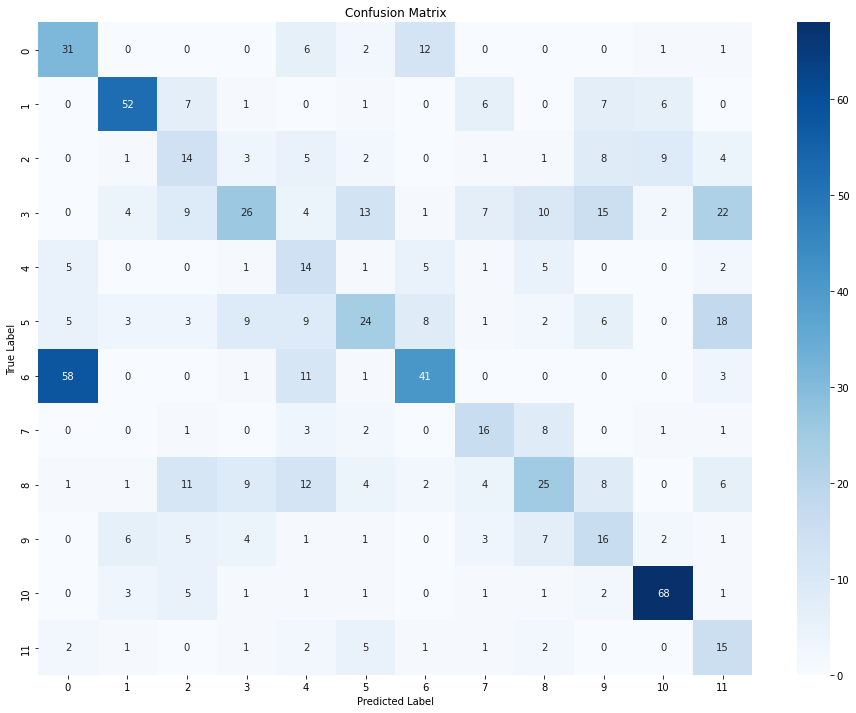

In [160]:

X = [[np.concatenate((img.flatten(),des.flatten(),hogf)) for img,des,hogf in zip(filterimagelist,siftlist,hoglist)] for filterimagelist,siftlist,hoglist in zip(filtered_imagelists,tuncated_siftlists,filtered_hoglists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
#1500轮仍未收敛
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1500))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

****
加入hog之后scv没有提升，尝试把原来的图片在特征中去除

In [174]:
from sklearn.svm import SVC
X = [[np.concatenate((des.flatten(),hogf)) for img,des,hogf in zip(filterimagelist,siftlist,hoglist)] for filterimagelist,siftlist,hoglist in zip(filtered_imagelists,tuncated_siftlists,filtered_hoglists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2),StandardScaler(),  SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.30      0.43      0.93      0.35      0.63      0.38        53
          1       0.79      0.51      0.98      0.62      0.71      0.48        80
          2       0.25      0.40      0.92      0.31      0.61      0.35        48
          3       0.76      0.34      0.98      0.47      0.57      0.31       113
          4       0.11      0.62      0.78      0.19      0.69      0.47        34
          5       0.58      0.43      0.96      0.50      0.64      0.39        88
          6       0.67      0.32      0.97      0.44      0.56      0.29       115
          7       0.28      0.62      0.93      0.39      0.76      0.57        32
          8       0.52      0.33      0.97      0.40      0.56      0.29        83
          9       0.25      0.13      0.98      0.17      0.36      0.12        46
         10       0.91      0.37      1.00      0.53      0.61      0.34        84
   

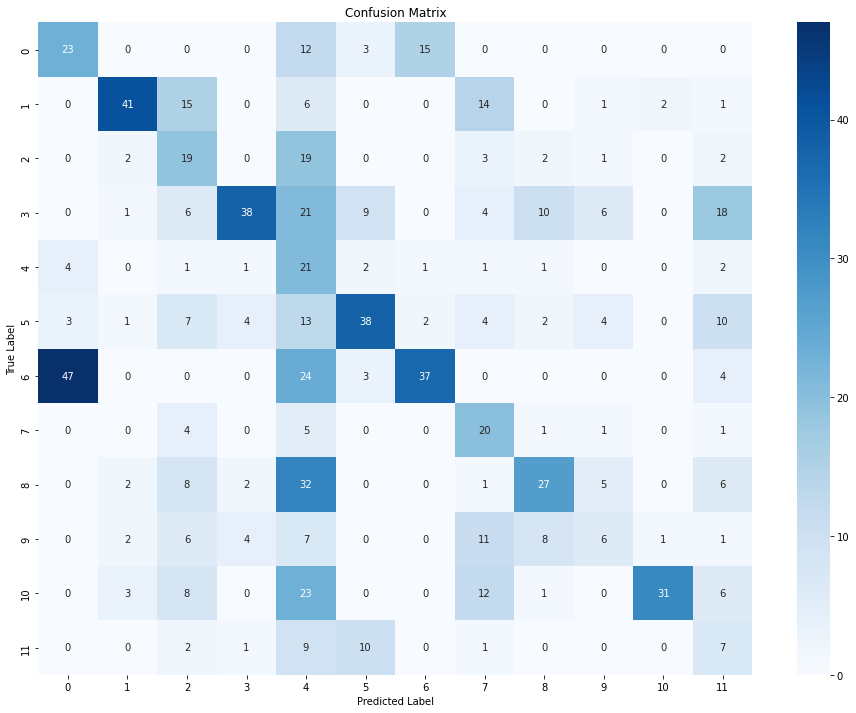

In [175]:

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


****
**LBP**

In [9]:
from skimage.feature import local_binary_pattern

def extractlbp(img):
    lbp = local_binary_pattern(img,8,1,method='uniform')
    return lbp

filtered_lbplists = []
for sublist in filtered_imagelists:
    lbplist = []
    for image in sublist:
        lbplist.append(extractlbp(image))
    filtered_lbplists.append(lbplist)

***
单独使用LBP进行分类

In [8]:

from sklearn.svm import SVC

X_combined = [item.flatten() for sublist in filtered_lbplists for item in sublist]
X_combined =  StandardScaler().fit_transform(X_combined)
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]
y_combined = [item for sublist in y for item in sublist]
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



NameError: name 'filtered_lbplists' is not defined

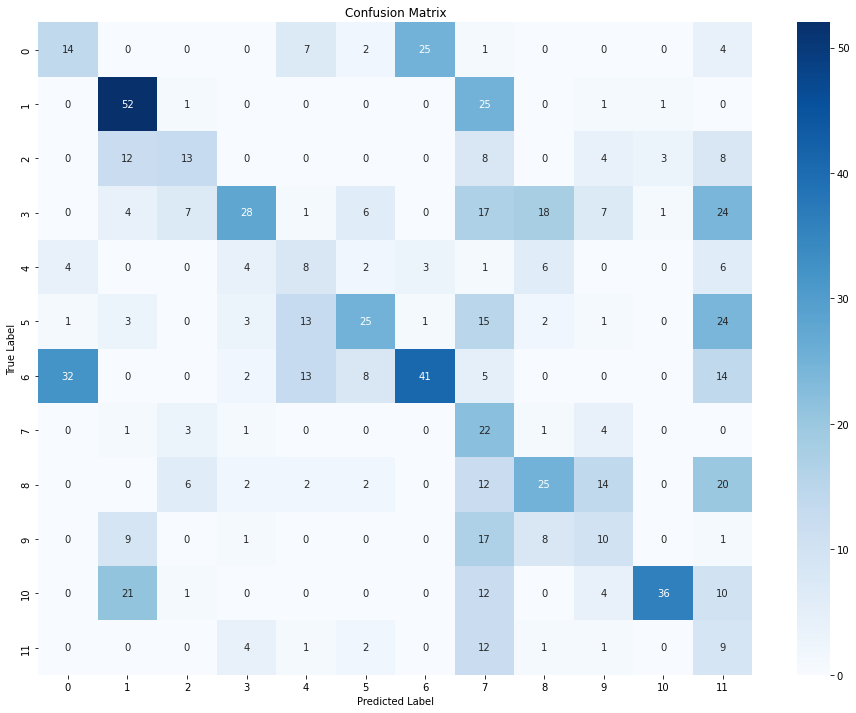

In [15]:
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


****
* 加入lbp特征之后，与分割后图片，sift特征，hog特征一起放进svc中
### 问题 
* 特征维度太高，可能导致维度灾难
### 解决
* 采用降维方法，降低维度

In [176]:
from sklearn.svm import SVC
X = [[np.concatenate((img.flatten(),des.flatten(),hogf,lbpf.flatten())) for img,des,hogf,lbpf in zip(filterimagelist,siftlist,hoglist,lbplist)] for filterimagelist,siftlist,hoglist,lbplist in zip(filtered_imagelists,tuncated_siftlists,filtered_hoglists,filtered_lbplists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]

X_combined = [item for sublist in X for item in sublist]
y_combined = [item for sublist in y for item in sublist]

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2),StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))



                   pre       rec       spe        f1       geo       iba       sup

          0       0.29      0.60      0.90      0.40      0.74      0.53        53
          1       0.74      0.76      0.97      0.75      0.86      0.73        80
          2       0.49      0.46      0.97      0.47      0.67      0.42        48
          3       0.70      0.27      0.98      0.39      0.52      0.25       113
          4       0.16      0.21      0.95      0.18      0.44      0.18        34
          5       0.42      0.19      0.97      0.27      0.43      0.17        88
          6       0.46      0.28      0.95      0.35      0.51      0.25       115
          7       0.26      0.62      0.93      0.36      0.76      0.56        32
          8       0.48      0.33      0.96      0.39      0.56      0.29        83
          9       0.42      0.54      0.95      0.47      0.72      0.50        46
         10       0.93      0.68      0.99      0.79      0.82      0.65        84
   

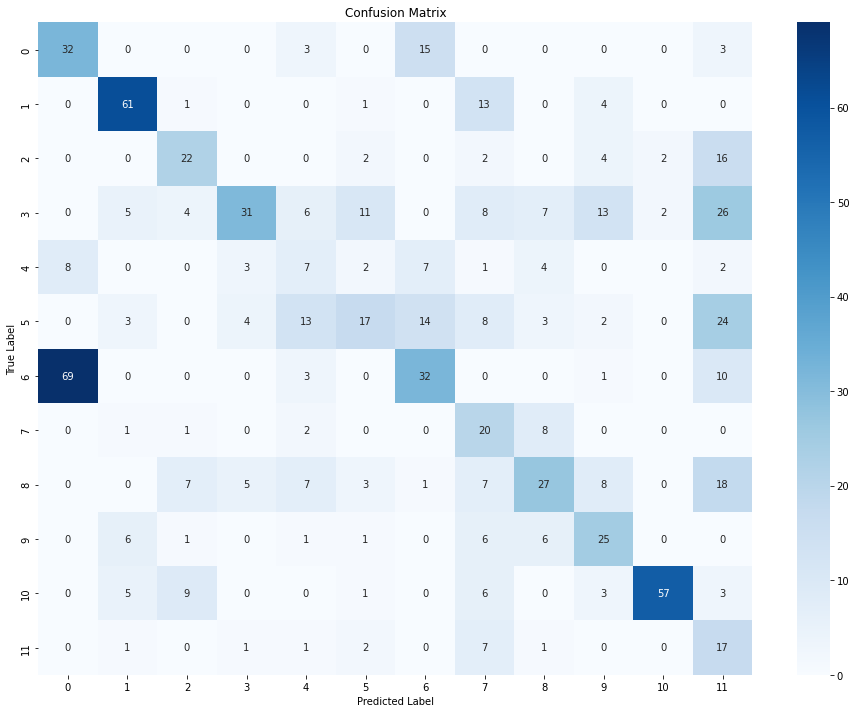

In [177]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**原始特征保存**

In [37]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
X = [[np.concatenate((img.flatten(),des.flatten(),hogf,lbpf.flatten())) for img,des,hogf,lbpf in zip(filterimagelist,siftlist,hoglist,lbplist)] for filterimagelist,siftlist,hoglist,lbplist in zip(filtered_imagelists,tuncated_siftlists,filtered_hoglists,filtered_lbplists)]
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]
X_combined = np.array([item for sublist in X for item in sublist])
y_combined = np.array([item for sublist in y for item in sublist])

In [38]:
np.save("../Data/Filtered_X_img_sift_hogf_lbpf.npy",X_combined)
np.save("../Data/Filtered_y_img_sift_hogf_lbpf.npy",y_combined)

***
  全部使用**PCA**降维再进行分类

In [76]:
from sklearn.decomposition import PCA

pca_img = PCA(n_components=16)
pca_des = PCA(n_components=30)
pca_hog = PCA(n_components=16)
pca_lbp = PCA(n_components=16)

sift_flattens = [item.flatten() for sublist in tuncated_siftlists for item in sublist]
siftlist_pca = pca_des.fit_transform(sift_flattens)


In [11]:
img_flattens = [item.flatten() for sublist in filtered_imagelists for item in sublist]
imglist_pca = pca_img.fit_transform(img_flattens)

In [77]:
hog_flattens = [item.flatten() for sublist in filtered_hoglists for item in sublist]
hoglist_pca = pca_hog.fit_transform(hog_flattens)

In [ ]:
lbp_flattens = [item.flatten() for sublist in filtered_lbplists for item in sublist]
lbp_flattens = np.array(lbp_flattens)
lbp_flattens = StandardScaler().fit_transform(lbp_flattens)
lbplist_pca = pca_lbp.fit_transform(lbp_flattens)

****
lbp特征以及原始图片采用pca降维十分耗时，改用直方图降维

***
原始图片也改用直方图降维

In [ ]:
lbphistlists = []
for sublist in filtered_lbplists:
    histlist = []
    for lbpf in sublist:
        max_bins = int(lbpf.max()+1)
        hist,_ = np.histogram(lbpf,density=True,bins = max_bins,range=(0,max_bins))
        histlist.append(hist)
        if len(hist)!=10:
            print("True")
    lbphistlists.append(np.array(histlist))
lbphistlists = np.array([lbpf for sublist in lbphistlists  for lbpf in sublist])

In [ ]:
imghistlists = []
for sublist in filtered_imagelists:
    histlist = []
    for img in sublist:
        max_bins = int(img.max()+1)
        hist,_ = np.histogram(img,density=True,bins = max_bins,range=(0,max_bins))
        histlist.append(hist)
    imghistlists.append(np.array(histlist))
imghistlists = np.array([lbpf for sublist in imghistlists  for lbpf in sublist])
lenofimglists = np.array([len(hist) for hist in imghistlists])
imghistlists = np.array([hist[:min(lenofimglists)] for hist in imghistlists])

In [79]:
X_combined = np.array([np.concatenate((img,lbpf,sift,hogf)) for img,lbpf,sift,hogf in zip(imghistlists,lbphistlists,siftlist_pca,hoglist_pca)])
y_combined = np.load("../Data/Filtered_y_pca_lda_811.npy")
np.save("../Data/Filtered_X_pca_hist_128,npy",X_combined)

***
PCA降维至128维之后进行LogisticRegression分类

                   pre       rec       spe        f1       geo       iba       sup

          0       0.34      0.72      0.90      0.46      0.80      0.63        53
          1       0.83      0.54      0.99      0.65      0.73      0.51        80
          2       0.69      0.69      0.98      0.69      0.82      0.65        48
          3       0.54      0.46      0.94      0.50      0.66      0.41       113
          4       0.46      0.68      0.97      0.55      0.81      0.63        34
          5       0.57      0.41      0.96      0.48      0.63      0.37        88
          6       0.70      0.34      0.98      0.46      0.58      0.31       115
          7       0.37      0.59      0.96      0.46      0.75      0.55        32
          8       0.61      0.48      0.96      0.54      0.68      0.44        83
          9       0.30      0.48      0.93      0.37      0.67      0.43        46
         10       0.79      0.79      0.98      0.79      0.88      0.75        84
   

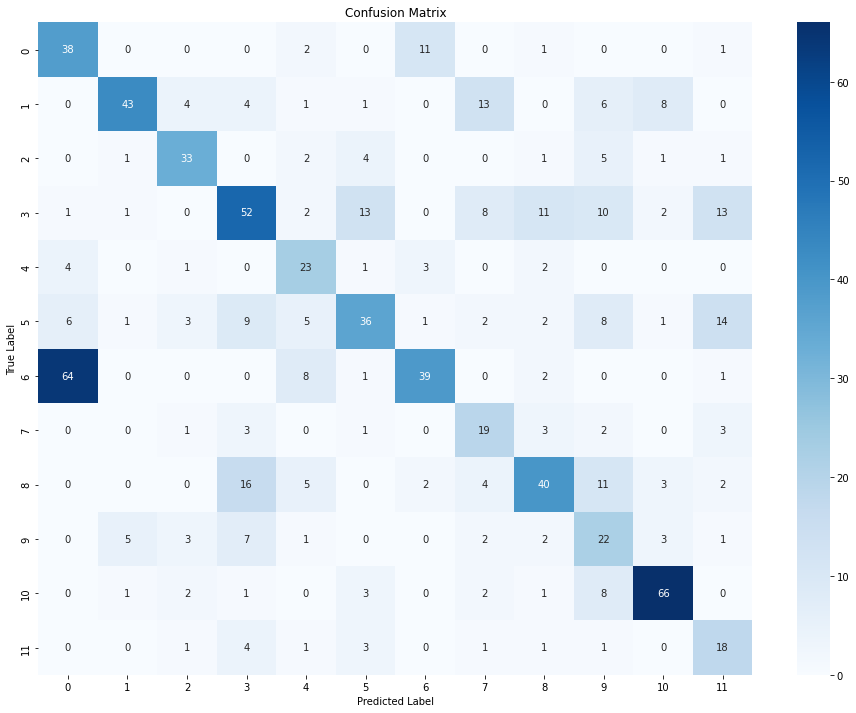

In [81]:

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


****
SVC

                   pre       rec       spe        f1       geo       iba       sup

          0       0.39      0.72      0.92      0.51      0.81      0.65        53
          1       0.81      0.69      0.98      0.74      0.82      0.66        80
          2       0.73      0.79      0.98      0.76      0.88      0.76        48
          3       0.69      0.65      0.95      0.67      0.79      0.60       113
          4       0.40      0.62      0.96      0.48      0.77      0.57        34
          5       0.76      0.48      0.98      0.59      0.68      0.44        88
          6       0.77      0.44      0.98      0.56      0.66      0.41       115
          7       0.42      0.53      0.97      0.47      0.72      0.49        32
          8       0.58      0.54      0.95      0.56      0.72      0.50        83
          9       0.39      0.46      0.96      0.42      0.66      0.41        46
         10       0.89      0.81      0.99      0.85      0.89      0.79        84
   

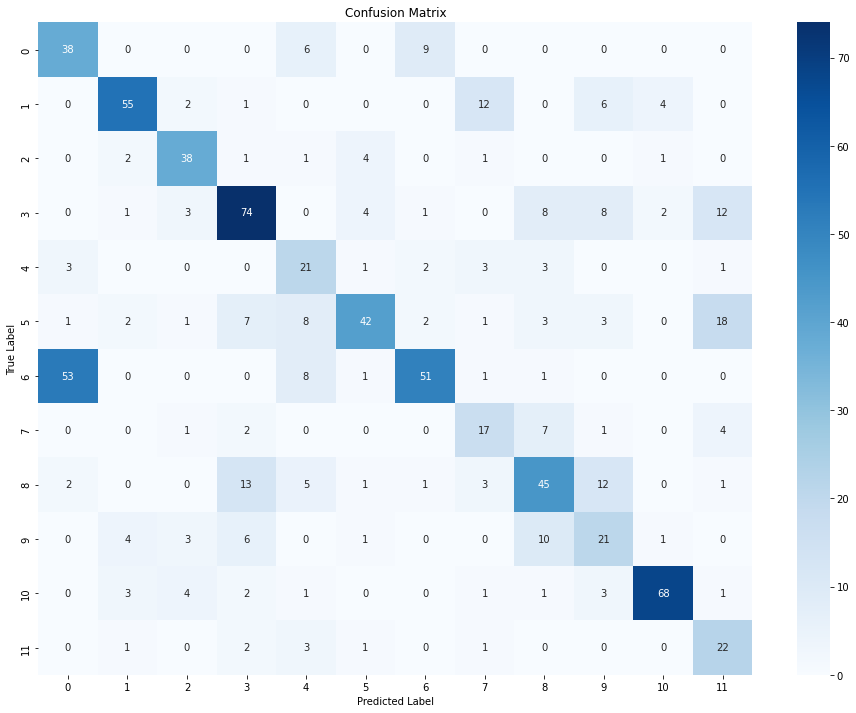

In [82]:

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
尝试SMOTE升采样

                   pre       rec       spe        f1       geo       iba       sup

          0       0.51      0.47      0.97      0.49      0.68      0.43        53
          1       0.86      0.93      0.98      0.89      0.95      0.90        80
          2       0.80      0.85      0.99      0.83      0.92      0.83        48
          3       0.68      0.74      0.94      0.71      0.84      0.69       113
          4       0.59      0.65      0.98      0.62      0.80      0.61        34
          5       0.83      0.78      0.98      0.81      0.88      0.75        88
          6       0.77      0.77      0.96      0.77      0.86      0.73       115
          7       0.82      0.56      0.99      0.67      0.75      0.54        32
          8       0.58      0.66      0.94      0.62      0.79      0.61        83
          9       0.55      0.39      0.98      0.46      0.62      0.36        46
         10       0.95      0.92      0.99      0.93      0.95      0.90        84
   

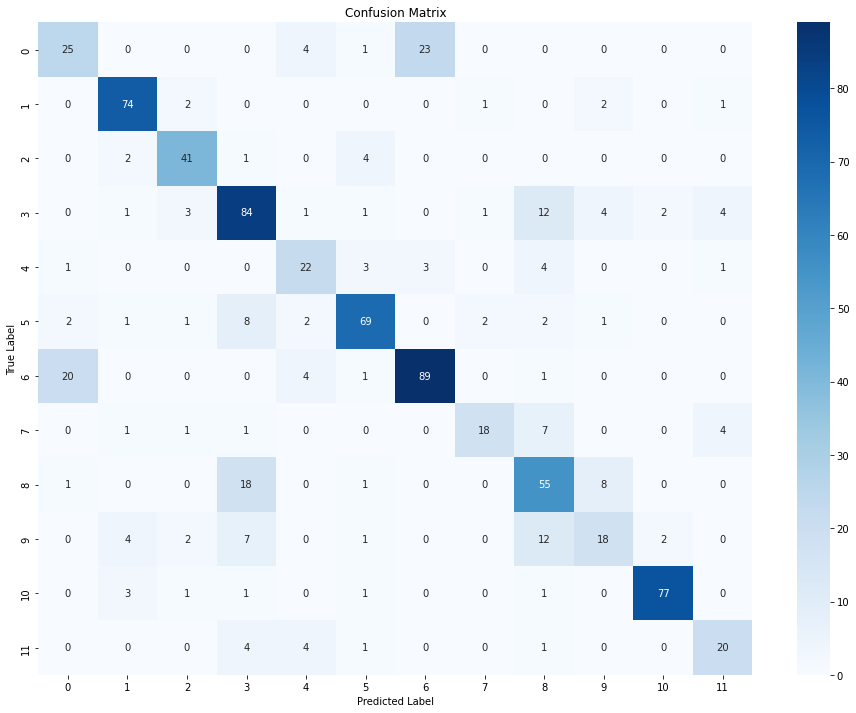

In [88]:
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


                   pre       rec       spe        f1       geo       iba       sup

          0       0.51      0.51      0.97      0.51      0.70      0.47        53
          1       0.86      0.95      0.98      0.90      0.97      0.93        80
          2       0.82      0.85      0.99      0.84      0.92      0.83        48
          3       0.69      0.74      0.95      0.71      0.84      0.69       113
          4       0.57      0.68      0.98      0.62      0.81      0.64        34
          5       0.79      0.80      0.97      0.79      0.88      0.76        88
          6       0.80      0.74      0.97      0.77      0.85      0.70       115
          7       0.79      0.47      0.99      0.59      0.68      0.44        32
          8       0.57      0.63      0.95      0.60      0.77      0.57        83
          9       0.57      0.46      0.98      0.51      0.67      0.42        46
         10       0.95      0.92      0.99      0.93      0.95      0.90        84
   

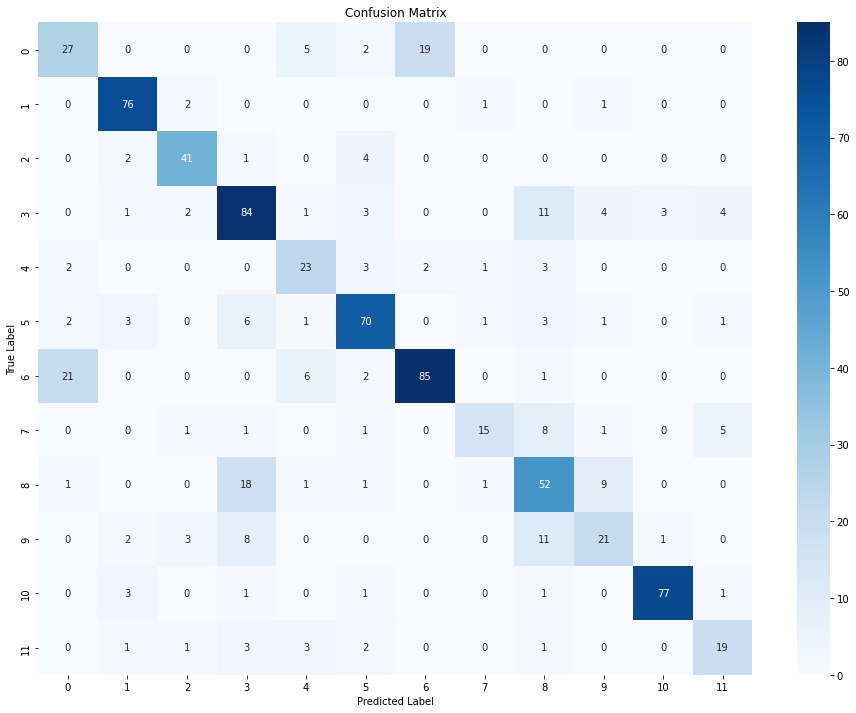

In [87]:
from imblearn.over_sampling import RandomOverSampler
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(RandomOverSampler(random_state=42), StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
尝试混合采样方法

d:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   pre       rec       spe        f1       geo       iba       sup

          0       0.29      0.79      0.86      0.42      0.83      0.68        53
          1       0.62      0.68      0.95      0.65      0.80      0.63        80
          2       0.62      0.83      0.97      0.71      0.90      0.80        48
          3       0.00      0.00      1.00      0.00      0.00      0.00       113
          4       0.29      0.82      0.91      0.43      0.87      0.75        34
          5       0.62      0.17      0.99      0.27      0.41      0.15        88
          6       1.00      0.02      1.00      0.03      0.13      0.02       115
          7       0.34      0.75      0.94      0.47      0.84      0.69        32
          8       0.89      0.10      1.00      0.17      0.31      0.09        83
          9       0.20      0.65      0.84      0.31      0.74      0.54        46
         10       0.91      0.51      0.99      0.66      0.71      0.48        84
   

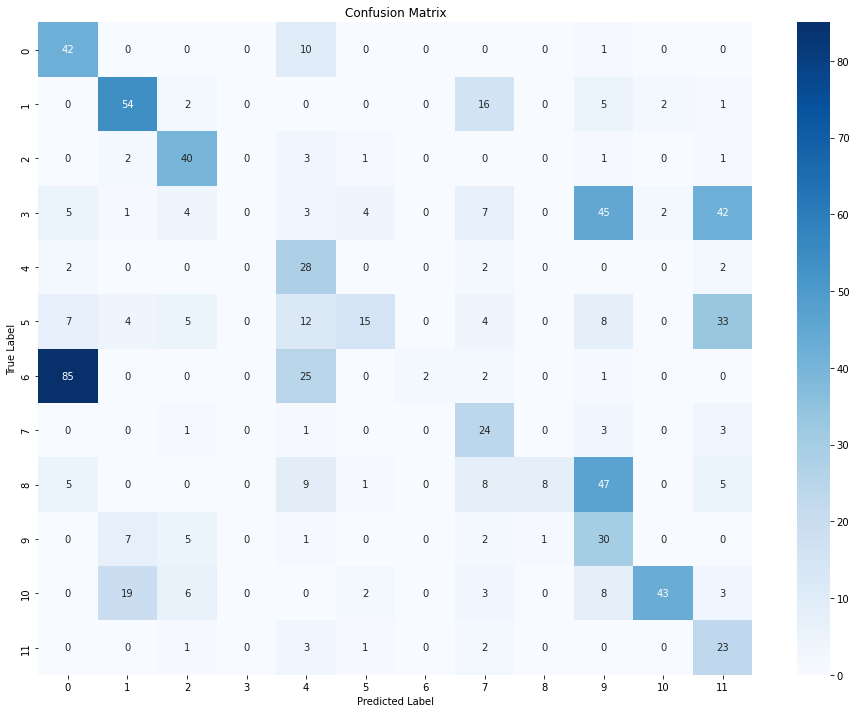

In [90]:
from imblearn.combine import SMOTEENN
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(SMOTEENN(random_state=42), StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


                   pre       rec       spe        f1       geo       iba       sup

          0       0.51      0.45      0.97      0.48      0.66      0.42        53
          1       0.87      0.93      0.98      0.90      0.95      0.91        80
          2       0.80      0.85      0.99      0.83      0.92      0.83        48
          3       0.70      0.73      0.95      0.72      0.83      0.68       113
          4       0.56      0.68      0.98      0.61      0.81      0.64        34
          5       0.80      0.75      0.98      0.77      0.86      0.72        88
          6       0.77      0.78      0.96      0.78      0.87      0.74       115
          7       0.83      0.59      0.99      0.69      0.77      0.57        32
          8       0.58      0.65      0.95      0.61      0.78      0.60        83
          9       0.54      0.41      0.98      0.47      0.64      0.38        46
         10       0.95      0.92      0.99      0.93      0.95      0.90        84
   

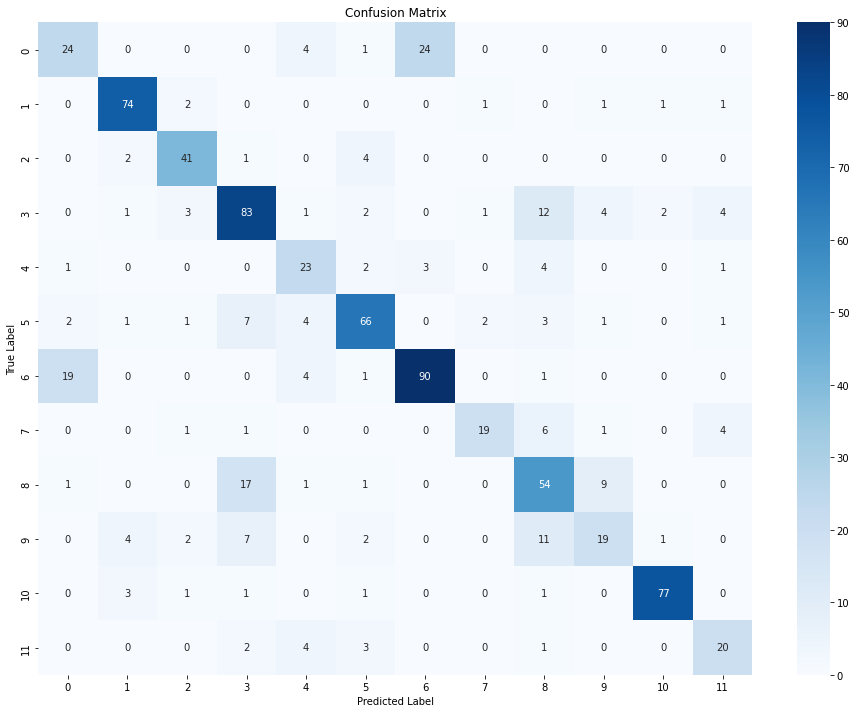

In [91]:
from imblearn.combine import SMOTETomek
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(SMOTETomek(random_state=42), StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
尝试不扩充

                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.26      0.99      0.38      0.51      0.24        53
          1       0.85      0.94      0.98      0.89      0.96      0.92        80
          2       0.78      0.83      0.99      0.81      0.91      0.81        48
          3       0.68      0.79      0.94      0.73      0.86      0.73       113
          4       0.69      0.53      0.99      0.60      0.72      0.50        34
          5       0.77      0.83      0.97      0.80      0.90      0.79        88
          6       0.72      0.89      0.94      0.79      0.91      0.83       115
          7       0.80      0.38      1.00      0.51      0.61      0.35        32
          8       0.56      0.75      0.93      0.64      0.83      0.68        83
          9       0.77      0.37      0.99      0.50      0.61      0.34        46
         10       0.92      0.90      0.99      0.91      0.95      0.89        84
   

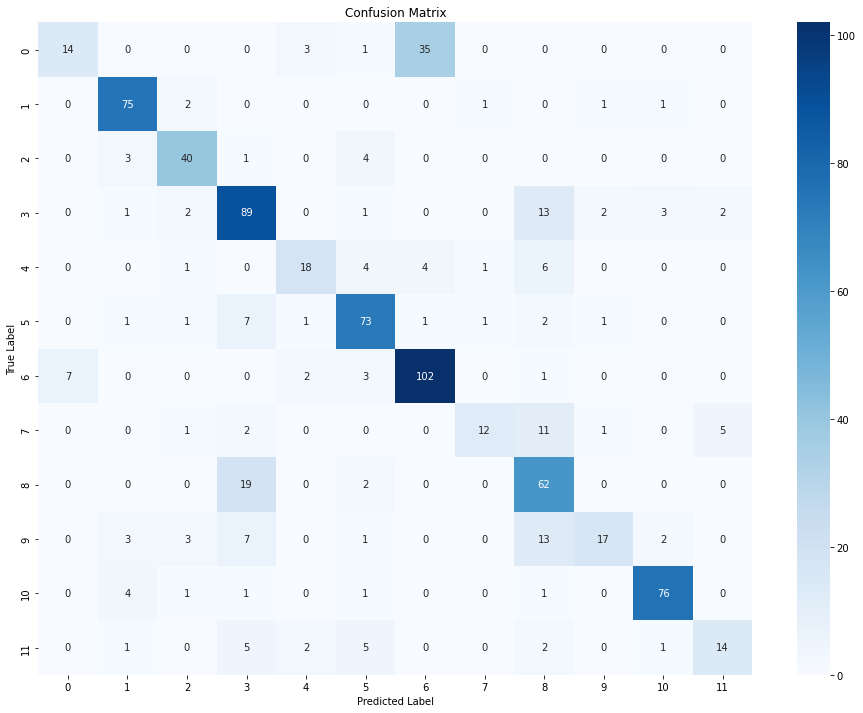

In [84]:
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline( StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


*************
### 采样方法总结
SMOTE过采样在同样的设置下表现最优

***
LR

                   pre       rec       spe        f1       geo       iba       sup

          0       0.46      0.51      0.96      0.48      0.70      0.47        53
          1       0.76      0.70      0.98      0.73      0.83      0.66        80
          2       0.79      0.77      0.99      0.78      0.87      0.74        48
          3       0.71      0.62      0.96      0.66      0.77      0.57       113
          4       0.51      0.71      0.97      0.59      0.83      0.67        34
          5       0.78      0.61      0.98      0.69      0.78      0.58        88
          6       0.76      0.68      0.96      0.72      0.81      0.64       115
          7       0.46      0.59      0.97      0.52      0.76      0.56        32
          8       0.59      0.64      0.95      0.61      0.78      0.59        83
          9       0.42      0.48      0.96      0.44      0.68      0.44        46
         10       0.86      0.88      0.98      0.87      0.93      0.86        84
   

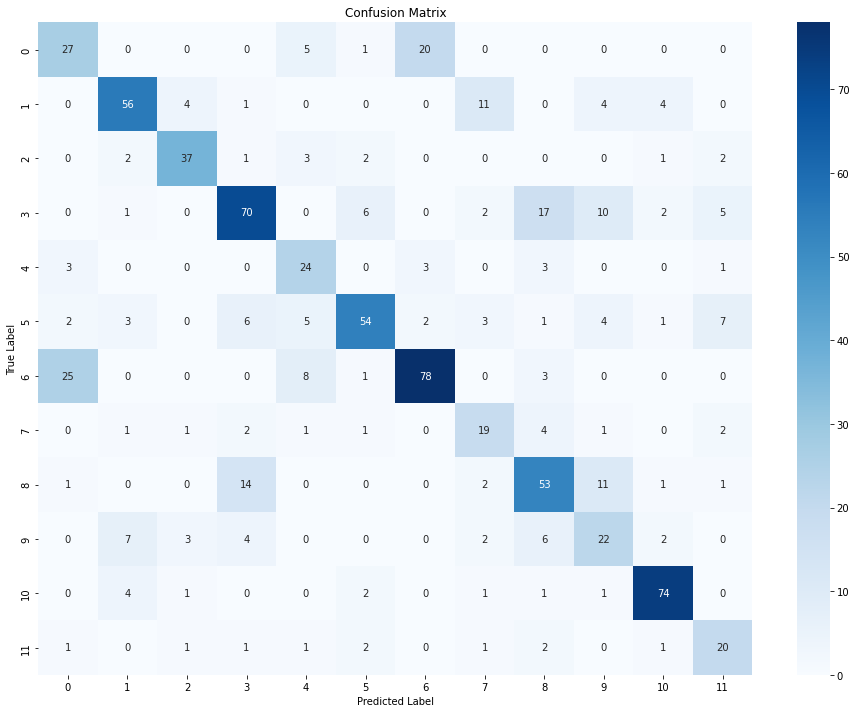

In [93]:
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), LogisticRegression(max_iter=1500))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
随机森林

                   pre       rec       spe        f1       geo       iba       sup

          0       0.66      0.47      0.98      0.55      0.68      0.44        53
          1       0.75      0.85      0.97      0.80      0.91      0.81        80
          2       0.69      0.77      0.98      0.73      0.87      0.74        48
          3       0.79      0.73      0.97      0.76      0.84      0.69       113
          4       0.65      0.65      0.98      0.65      0.80      0.62        34
          5       0.78      0.75      0.97      0.76      0.85      0.71        88
          6       0.80      0.82      0.97      0.81      0.89      0.78       115
          7       0.68      0.66      0.99      0.67      0.80      0.63        32
          8       0.67      0.80      0.96      0.73      0.87      0.75        83
          9       0.51      0.46      0.97      0.48      0.67      0.42        46
         10       0.85      0.81      0.98      0.83      0.89      0.78        84
   

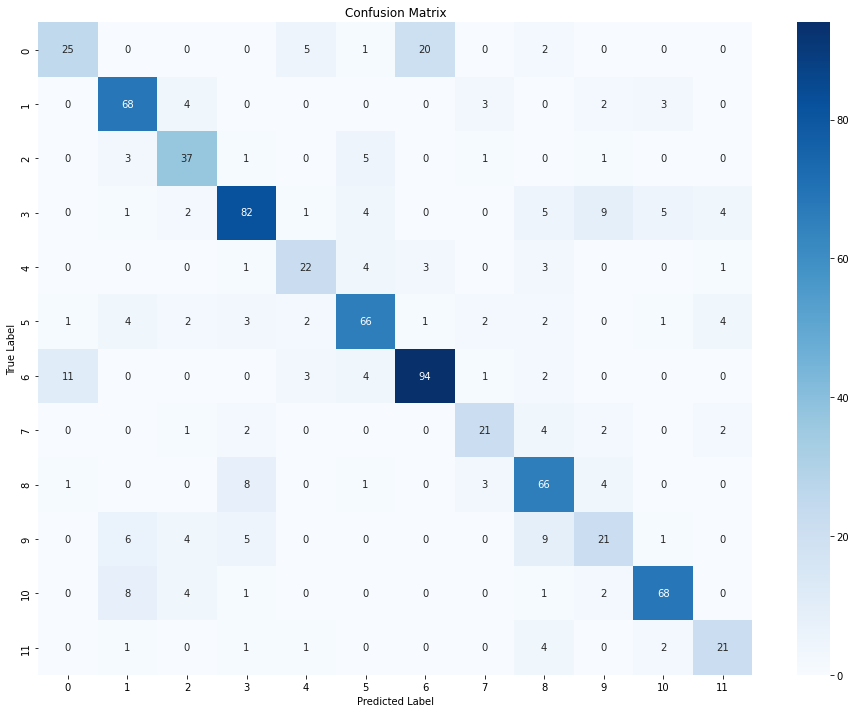

In [95]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.51      0.99      0.60      0.71      0.48        53
          1       0.88      0.90      0.99      0.89      0.94      0.88        80
          2       0.82      0.85      0.99      0.84      0.92      0.83        48
          3       0.77      0.77      0.96      0.77      0.86      0.73       113
          4       0.78      0.62      0.99      0.69      0.78      0.59        34
          5       0.80      0.80      0.98      0.80      0.88      0.76        88
          6       0.79      0.86      0.96      0.82      0.91      0.82       115
          7       0.85      0.69      0.99      0.76      0.83      0.66        32
          8       0.69      0.87      0.95      0.77      0.91      0.82        83
          9       0.56      0.50      0.98      0.53      0.70      0.46        46
         10       0.92      0.93      0.99      0.92      0.96      0.91        84
   

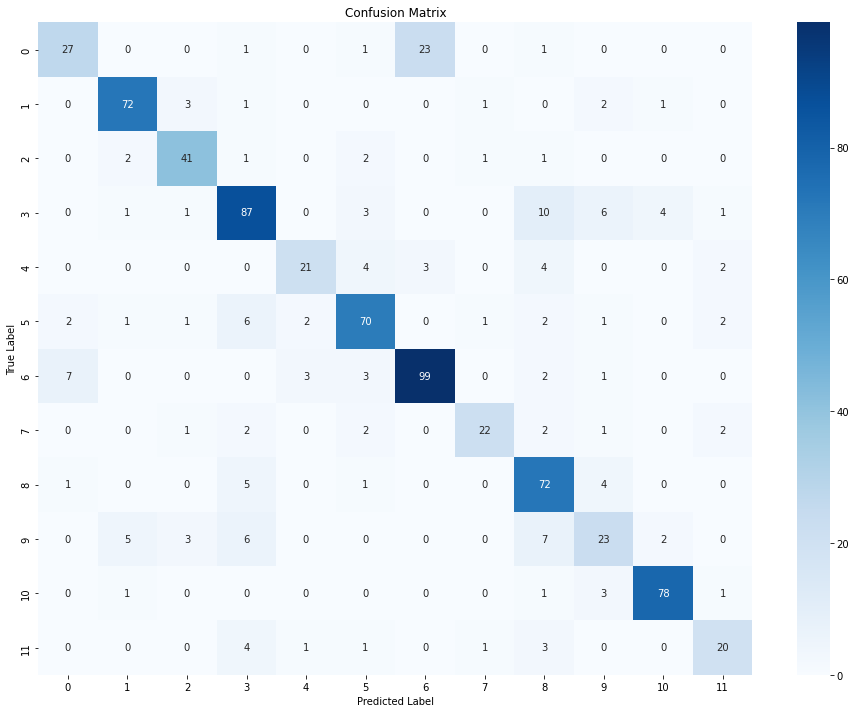

In [97]:
import xgboost as xgb
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), xgb.XGBClassifier(objective='binary:logistic', random_state=42))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      0.42      0.99      0.53      0.64      0.39        53
          1       0.75      0.88      0.97      0.81      0.92      0.84        80
          2       0.71      0.83      0.98      0.77      0.90      0.80        48
          3       0.77      0.75      0.96      0.76      0.85      0.71       113
          4       0.65      0.65      0.98      0.65      0.80      0.62        34
          5       0.77      0.77      0.97      0.77      0.87      0.74        88
          6       0.78      0.87      0.96      0.82      0.91      0.83       115
          7       0.76      0.59      0.99      0.67      0.77      0.57        32
          8       0.69      0.81      0.96      0.74      0.88      0.76        83
          9       0.55      0.39      0.98      0.46      0.62      0.36        46
         10       0.88      0.87      0.99      0.87      0.93      0.85        84
   

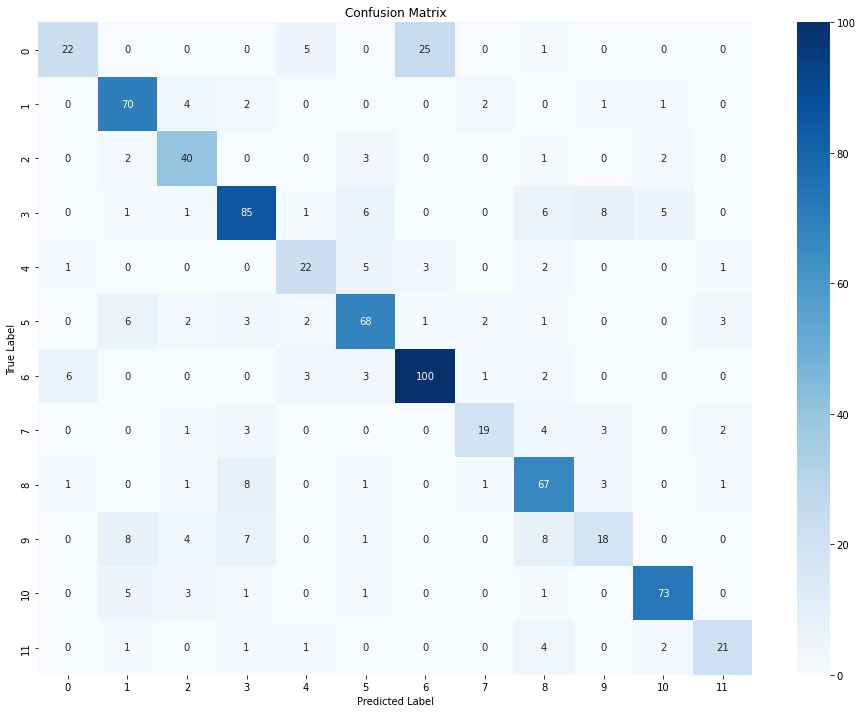

In [98]:
from sklearn.ensemble import ExtraTreesClassifier
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), ExtraTreesClassifier(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

*******

### 优化方向
* 集成学习

****
投票集成

                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.47      0.99      0.57      0.68      0.44        53
          1       0.87      0.91      0.98      0.89      0.95      0.89        80
          2       0.79      0.88      0.99      0.83      0.93      0.85        48
          3       0.78      0.79      0.96      0.78      0.87      0.75       113
          4       0.79      0.65      0.99      0.71      0.80      0.62        34
          5       0.81      0.84      0.98      0.83      0.91      0.81        88
          6       0.77      0.88      0.96      0.82      0.92      0.83       115
          7       0.88      0.66      1.00      0.75      0.81      0.63        32
          8       0.66      0.83      0.95      0.73      0.89      0.78        83
          9       0.64      0.46      0.98      0.53      0.67      0.43        46
         10       0.95      0.96      0.99      0.96      0.98      0.96        84
   

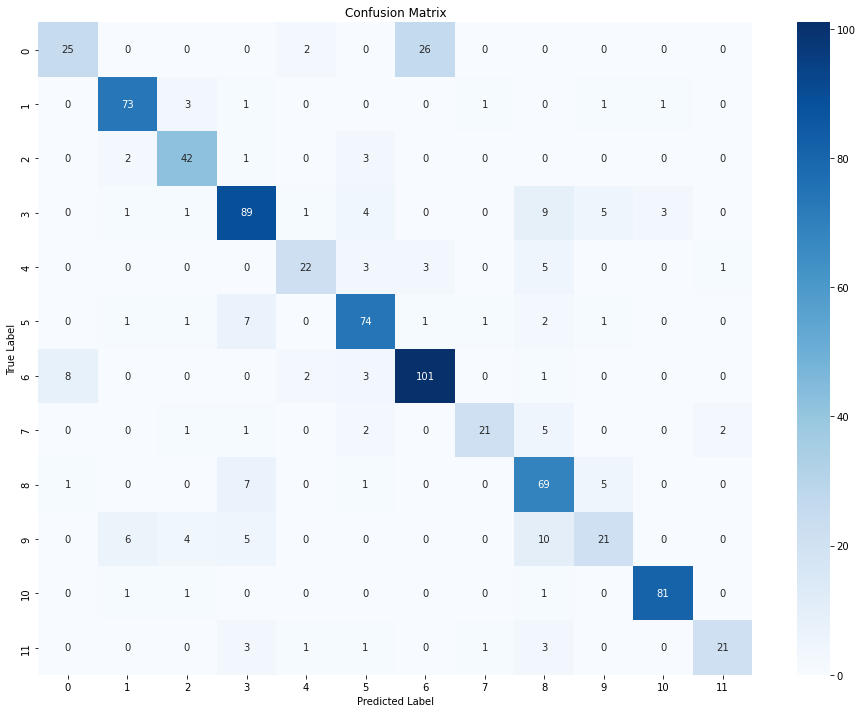

In [101]:
from sklearn.ensemble import VotingClassifier

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)

extra_trees_cls =ExtraTreesClassifier(random_state=42)
random_forest_cls = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
svc = SVC(probability=True,random_state=42)

voting_model = VotingClassifier(
    estimators=[('ExtraTrees',extra_trees_cls),("rfs",random_forest_cls),("xgb",xgboost),("svc",svc)],
    voting="soft"
)

pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), voting_model)
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

                   pre       rec       spe        f1       geo       iba       sup

          0       0.71      0.55      0.98      0.62      0.73      0.51        53
          1       0.79      0.91      0.97      0.85      0.94      0.88        80
          2       0.72      0.88      0.98      0.79      0.93      0.85        48
          3       0.73      0.80      0.95      0.76      0.87      0.75       113
          4       0.70      0.68      0.99      0.69      0.82      0.65        34
          5       0.81      0.78      0.98      0.80      0.88      0.75        88
          6       0.81      0.83      0.97      0.82      0.90      0.80       115
          7       0.88      0.66      1.00      0.75      0.81      0.63        32
          8       0.68      0.78      0.96      0.73      0.87      0.74        83
          9       0.58      0.41      0.98      0.48      0.64      0.38        46
         10       0.94      0.88      0.99      0.91      0.94      0.87        84
   

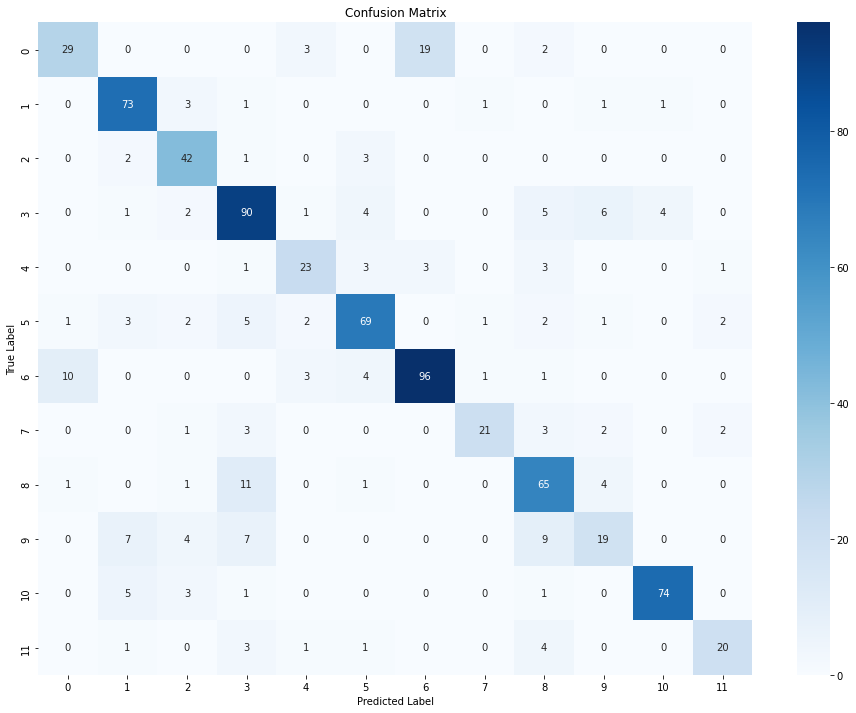

In [102]:
from sklearn.ensemble import VotingClassifier

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)

extra_trees_cls =ExtraTreesClassifier(random_state=42)
random_forest_cls = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
svc = SVC(probability=True,random_state=42)

voting_model = VotingClassifier(
    estimators=[('ExtraTrees',extra_trees_cls),("rfs",random_forest_cls),("xgb",xgboost),("svc",svc)],
    voting="hard"
)

pipeline = make_pipeline(SMOTE(random_state=42), StandardScaler(), voting_model)
pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
X_combined = np.load("../Data/Filtered_X_pca_lda_811.npy")
y_combined = np.load("../Data/Filtered_y_pca_lda_811.npy")

In [31]:
X_combined = np.array([t[:800] for t in X_combined])
X_combined = np.array([np.concatenate((t,lbpf))for t,lbpf in zip(X_combined,lbp_flattens)])
X_combined.shape

(4028, 50976)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                   pre       rec       spe        f1       geo       iba       sup

          0       0.24      0.30      0.93      0.27      0.53      0.26        53
          1       0.76      0.70      0.98      0.73      0.83      0.66        80
          2       0.30      0.25      0.96      0.27      0.49      0.22        48
          3       0.57      0.26      0.97      0.35      0.50      0.23       113
          4       0.16      0.21      0.95      0.18      0.44      0.18        34
          5       0.47      0.36      0.95      0.41      0.59      0.33        88
          6       0.57      0.46      0.94      0.51      0.66      0.41       115
          7       0.16      0.44      0.91      0.24      0.63      0.38        32
          8       0.41      0.29      0.95      0.34      0.52      0.26        83
          9       0.25      0.33      0.94      0.28      0.55      0.29        46
         10       0.72      0.68      0.97      0.70      0.81      0.64        84
   

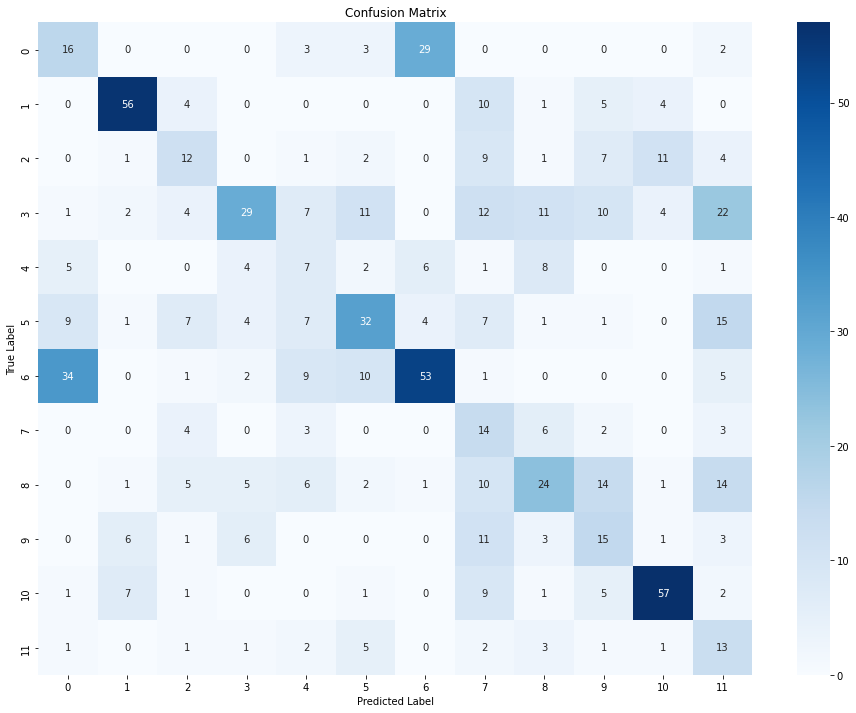

In [32]:

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


                   pre       rec       spe        f1       geo       iba       sup

          0       0.27      0.26      0.95      0.27      0.50      0.23        53
          1       0.56      0.68      0.94      0.61      0.80      0.62        80
          2       0.50      0.29      0.98      0.37      0.54      0.27        48
          3       0.62      0.21      0.98      0.32      0.46      0.19       113
          4       0.21      0.24      0.96      0.22      0.48      0.21        34
          5       0.50      0.32      0.96      0.39      0.55      0.29        88
          6       0.56      0.35      0.96      0.43      0.58      0.31       115
          7       0.13      0.72      0.80      0.22      0.76      0.57        32
          8       0.43      0.31      0.95      0.36      0.55      0.28        83
          9       0.23      0.20      0.96      0.21      0.43      0.17        46
         10       0.80      0.39      0.99      0.53      0.62      0.37        84
   

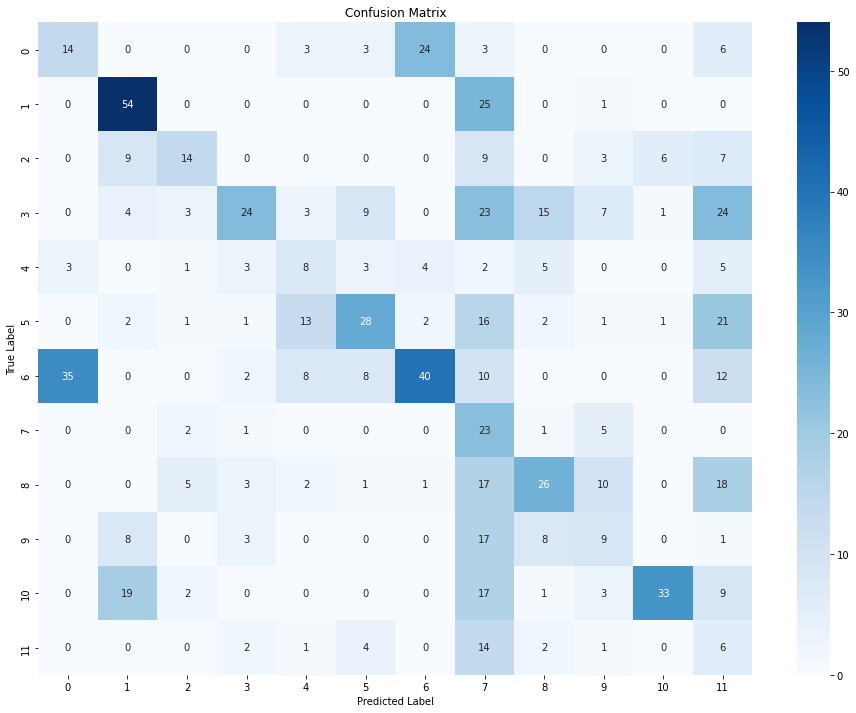

In [33]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


*****
## 使用了lda降维的全废了

***
使用lda降维收到限制，只能降到11维

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lbp_lda = LinearDiscriminantAnalysis(n_components = 11)
lbp_flattens = [item.flatten() for sublist in filtered_lbplists for item in sublist]
lbp_flattens = np.array(lbp_flattens)


In [25]:
y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]
y_combined = [item for sublist in y for item in sublist]
y_combined =np.array(y_combined)


In [26]:

lbplist_lda = lbp_lda.fit_transform(lbp_flattens,y_combined)

In [32]:
X_combined = [np.concatenate([img,des,hogf,lbpf]) for img,des,hogf,lbpf in zip(imglist_pca,siftlist_pca,hoglist_pca,lbplist_lda)]
X_combined = np.array(X_combined)
X_combined =  StandardScaler().fit_transform(X_combined)

y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]
y_combined = [item for sublist in y for item in sublist]
y_combined =np.array(y_combined)

In [34]:
np.save("../Data/Filtered_X_pca_lda_811.npy",X_combined)
np.save("../Data/Filtered_y_pca_lda_811.npy",y_combined)

***
**SVC**

                   pre       rec       spe        f1       geo       iba       sup

          0       0.50      0.43      0.97      0.46      0.65      0.40        53
          1       0.74      0.57      0.98      0.65      0.75      0.54        80
          2       0.40      0.40      0.96      0.40      0.62      0.36        48
          3       0.69      0.29      0.98      0.41      0.53      0.27       113
          4       0.27      0.56      0.93      0.37      0.72      0.50        34
          5       0.62      0.42      0.97      0.50      0.64      0.38        88
          6       0.75      0.31      0.98      0.44      0.55      0.29       115
          7       0.13      0.78      0.78      0.22      0.78      0.61        32
          8       0.51      0.23      0.98      0.32      0.47      0.21        83
          9       0.39      0.41      0.96      0.40      0.63      0.38        46
         10       0.92      0.40      1.00      0.56      0.63      0.38        84
   

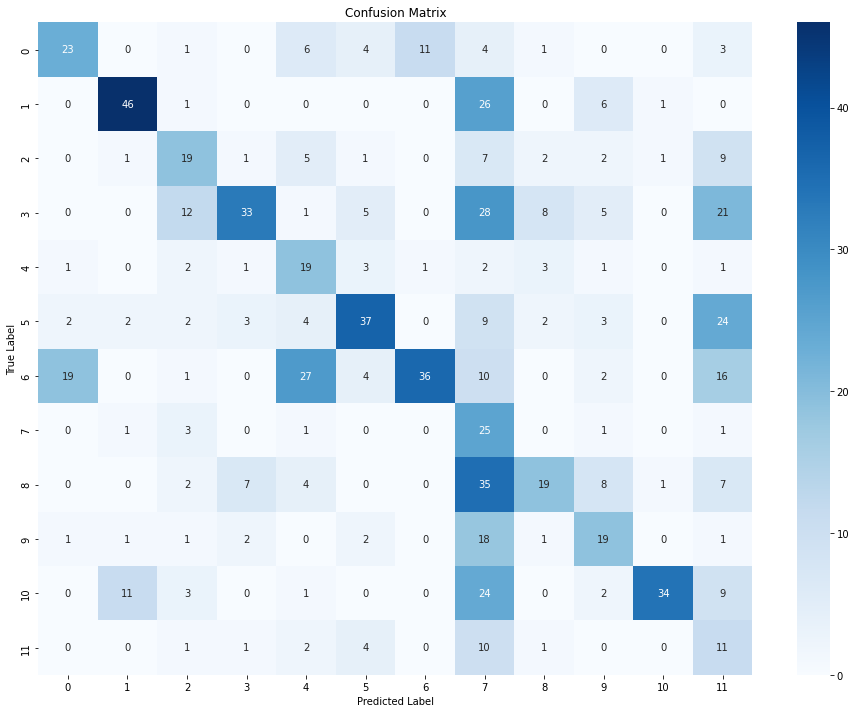

In [35]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2),StandardScaler(),  SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
***LogisticRegression***

                   pre       rec       spe        f1       geo       iba       sup

          0       0.44      0.49      0.96      0.46      0.68      0.45        53
          1       0.83      0.65      0.98      0.73      0.80      0.62        80
          2       0.26      0.52      0.91      0.34      0.69      0.45        48
          3       0.46      0.31      0.94      0.37      0.54      0.27       113
          4       0.23      0.47      0.93      0.31      0.66      0.42        34
          5       0.37      0.36      0.92      0.37      0.58      0.32        88
          6       0.73      0.49      0.97      0.58      0.69      0.45       115
          7       0.64      0.66      0.98      0.65      0.80      0.62        32
          8       0.43      0.35      0.95      0.39      0.58      0.31        83
          9       0.32      0.43      0.94      0.37      0.64      0.39        46
         10       0.88      0.50      0.99      0.64      0.70      0.47        84
   

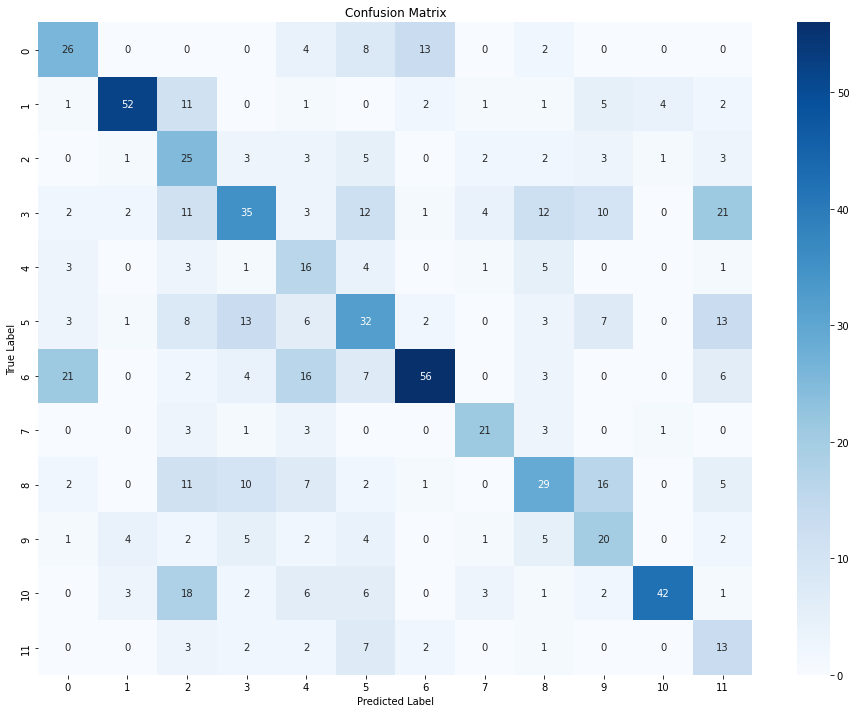

In [36]:

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


***
* 使用lda以及pca降维到811维时得到与降维相似的效果，但是对于第0类和第6类预测混淆的情况有了很大改善
* 并且无论svc还是lr都达到同样的效果，后续打算将两个分类器一起使用


***
  **LDA**降到44维再进行分类


In [9]:
del imglist_pca, siftlist_pca, hoglist_pca,X,y,X_combined,y_combined,resizeimagelists,reverse_siftlists,colorseglists

NameError: name 'imglist_pca' is not defined

In [10]:
del resizeimagelists,reverse_siftlists,colorseglists

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
img_lda = LinearDiscriminantAnalysis(n_components = 11)
sift_lda = LinearDiscriminantAnalysis(n_components = 11)
hog_lda = LinearDiscriminantAnalysis(n_components = 11)
lbp_lda = LinearDiscriminantAnalysis(n_components = 11)

y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]
y_combined = [item for sublist in y for item in sublist]
y_combined =np.array(y_combined)

In [12]:
img_flattens = [item.flatten() for sublist in filtered_imagelists for item in sublist]
img_flattens = np.array(img_flattens)
imglist_lda = img_lda.fit_transform(img_flattens,y_combined)

In [13]:
del img_flattens

In [14]:
sift_flattens = [item.flatten() for sublist in tuncated_siftlists for item in sublist]
sift_flattens = np.array(sift_flattens)
siftlist_lda = sift_lda.fit_transform(sift_flattens,y_combined)

In [15]:
del sift_flattens

In [16]:
hog_flattens = [item.flatten() for sublist in filtered_hoglists for item in sublist]
hog_flattens = np.array(hog_flattens)
hoglist_lda = hog_lda.fit_transform(hog_flattens,y_combined)

In [17]:
del hog_flattens

In [18]:
lbp_flattens = [item.flatten() for sublist in filtered_lbplists for item in sublist]
lbp_flattens = np.array(lbp_flattens)
lbplist_lda = lbp_lda.fit_transform(lbp_flattens,y_combined)

In [19]:
del lbp_flattens

In [20]:
X_combined = [np.concatenate([img,des,hogf,lbpf]) for img,des,hogf,lbpf in zip(imglist_lda,siftlist_lda,hoglist_lda,lbplist_lda)]
X_combined = np.array(X_combined)
X_combined =  StandardScaler().fit_transform(X_combined)

y = [[np.array(i) for i in labellist]for labellist in filtered_labellists]
y_combined = [item for sublist in y for item in sublist]
y_combined =np.array(y_combined)

In [21]:
np.save("../Data/X_img_sift_hog_lbp_lda_44.npy",X_combined)
np.save("../Data/y_img_sift_hog_lbp_lda_44.npy",y_combined)

In [25]:
len(X_combined[0]),len(X_combined)

(44, 4028)

**LDA**降维方法并不适用于机器学习，更加适用于特征抽取，因为它是一种监督学习算法，无法用在预测上面

***
**SVC**


                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      1.00      0.99      0.99      0.98        53
          1       1.00      1.00      1.00      1.00      1.00      1.00        80
          2       1.00      1.00      1.00      1.00      1.00      1.00        48
          3       1.00      1.00      1.00      1.00      1.00      1.00       113
          4       0.94      1.00      1.00      0.97      1.00      1.00        34
          5       1.00      1.00      1.00      1.00      1.00      1.00        88
          6       1.00      0.99      1.00      1.00      1.00      0.99       115
          7       1.00      1.00      1.00      1.00      1.00      1.00        32
          8       1.00      1.00      1.00      1.00      1.00      1.00        83
          9       1.00      1.00      1.00      1.00      1.00      1.00        46
         10       1.00      1.00      1.00      1.00      1.00      1.00        84
   

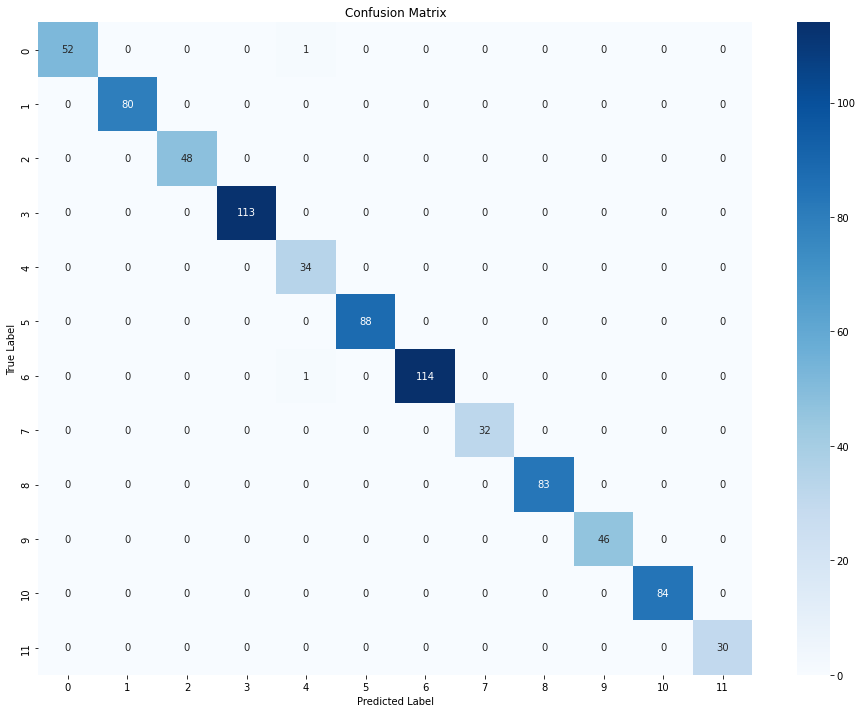

In [23]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), SVC())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



***
***LogisticRegression***


                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00        53
          1       1.00      1.00      1.00      1.00      1.00      1.00        80
          2       1.00      1.00      1.00      1.00      1.00      1.00        48
          3       1.00      1.00      1.00      1.00      1.00      1.00       113
          4       1.00      1.00      1.00      1.00      1.00      1.00        34
          5       1.00      1.00      1.00      1.00      1.00      1.00        88
          6       1.00      1.00      1.00      1.00      1.00      1.00       115
          7       1.00      1.00      1.00      1.00      1.00      1.00        32
          8       1.00      1.00      1.00      1.00      1.00      1.00        83
          9       1.00      1.00      1.00      1.00      1.00      1.00        46
         10       1.00      1.00      1.00      1.00      1.00      1.00        84
   

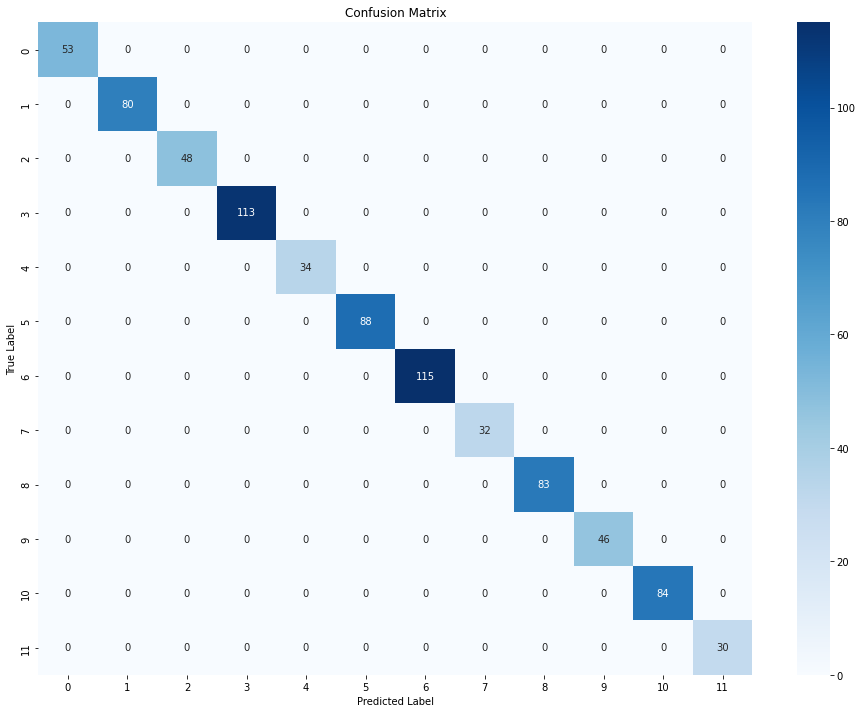

In [24]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



X_train,X_test,y_train,y_test = train_test_split(X_combined,y_combined,random_state=RANDOM_STATE,test_size=0.2,shuffle=True)
pipeline = make_pipeline(NearMiss(version=2), StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pred = list(y_pred)
y_test = [int(y) for y in y_test]

print(classification_report_imbalanced(y_test, y_pred))


conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(16,12))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=imagelabel, yticklabels=imagelabel)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
